# Import Python Libraries

In [2]:
# SPDX-FileCopyrightText: 2023 NORCE
# SPDX-License-Identifier: GPL-3.0

""""mass2022
Script to run Data exploration and Machine Learning models
"""
###### Imports Python Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, FuncFormatter
from matplotlib import ticker
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from pyswarm import pso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score 
import time
# plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

# 1. Data Loading 

In [3]:
# #### Data Loading with NPY

# # Set the seed
# folder= ''
# np.random.seed(3)

# #Loading, reshaping and transforming in Pandas DataFrame the inputs
# inputs = np.load(folder + 'inputs.npy')
# inputs_reshaped = inputs.reshape(-1, 3)
# inputs_df= pd.DataFrame(inputs_reshaped, columns = ['Gas_rate','Permeability','Porosity'])

# #Loading and reshaping the outputs
# # CO2 Retained 
# output1 = np.load(folder + 'co2_retained.npy').reshape(-1, 1)

# # Oil Production
# output2 = np.load(folder + 'oil_production_total.npy').reshape(-1, 1)


# # Transforming outputs in Pandas DatFrame 
# outputs = np.stack([output1, output2], axis=1)
# outputs_reshaped = outputs.reshape(-1,2)
# outputs_df = pd.DataFrame(outputs_reshaped, columns = ['CO2_retained','Oilproduction'])

# # Dataframe with inputs and outputs
# data = pd.concat([inputs_df,outputs_df], axis=1)

In [61]:
wag_42 = pd.read_csv("co2eor_random_seed-42_simulation_results.csv")
wag_7 = pd.read_csv("co2eor_random_seed-7_simulation_results.csv")

wag_42_lhs = pd.read_csv("co2eor_lhs_seed-42_simulation_results.csv")
wag_7_lhs = pd.read_csv("co2eor_lhs_seed-7_simulation_results.csv")
# wag_lhs = pd.read_csv("wag_lhs_simulation_results.csv")
sag_7 = pd.read_csv("foam_random_seed-7_simulation_results.csv")

wag_7.head()

,Gas Injection Rate (GRATES),Water Injection Rate (WRATES),oil_pro_vol,wat_inj_vol,wat_pro_vol,gas_inj_vol,gas_pro_vol,gas_retained,co2_injected,co2_backprod,co2_retained,prod_bhp,inj_bhp,ratio_oil_to_inj_vol
0,1305.233157,14381.348210,18948412.0,25954656.0,2.427910e+06,2382050.5,11731981.0,-9349930.5,2382068.75,878328.125,1503740.625,2400.0,0.0,0.668688
1,4119.675169,9697.126947,15706077.0,17697256.0,2.096735e+05,7518407.0,14106249.0,-6587842.0,7518398.50,5109814.000,2408584.500,2400.0,0.0,0.622870
2,2753.636926,5056.419539,9389887.0,9227966.0,1.389825e+05,5025387.5,8120734.0,-3095346.5,5025393.50,2742207.500,2283186.000,2400.0,0.0,0.658784
3,3893.860711,14992.083014,19566632.0,26676796.0,3.261526e+06,7106296.0,15290559.0,-8184263.0,7106263.00,4082795.750,3023467.250,2400.0,0.0,0.579184
4,4911.958048,5477.732127,10441852.0,9996861.0,1.516091e+05,8964323.0,11905220.0,-2940897.0,8964314.00,5924127.000,3040187.000,2400.0,0.0,0.550696


# 2. Data Preprocessing

## 2.1. EDA

In [5]:
# Variables information
wag_7.info()
column_name=wag_7.columns
print(column_name)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Gas Injection Rate (GRATES)    300 non-null    float64
 1   Water Injection Rate (WRATES)  300 non-null    float64
 2   oil_pro_vol                    300 non-null    float64
 3   wat_inj_vol                    300 non-null    float64
 4   wat_pro_vol                    300 non-null    float64
 5   gas_inj_vol                    300 non-null    float64
 6   gas_pro_vol                    300 non-null    float64
 7   gas_retained                   300 non-null    float64
 8   co2_injected                   300 non-null    float64
 9   co2_backprod                   300 non-null    float64
 10  co2_retained                   300 non-null    float64
 11  prod_bhp                       300 non-null    float64
 12  inj_bhp                        300 non-null    flo

In [6]:
wag_7_lhs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Gas Injection Rate (GRATES)    300 non-null    float64
 1   Water Injection Rate (WRATES)  300 non-null    float64
 2   oil_pro_vol                    300 non-null    float64
 3   wat_inj_vol                    300 non-null    float64
 4   wat_pro_vol                    300 non-null    float64
 5   gas_inj_vol                    300 non-null    float64
 6   gas_pro_vol                    300 non-null    float64
 7   gas_retained                   300 non-null    float64
 8   co2_injected                   300 non-null    float64
 9   co2_backprod                   300 non-null    float64
 10  co2_retained                   300 non-null    float64
 11  prod_bhp                       300 non-null    float64
 12  inj_bhp                        300 non-null    flo

In [63]:
# Rename columns
wag_7 = wag_7.rename(columns={"Gas Injection Rate (GRATES)": "qg", "Water Injection Rate (WRATES)":"qw"})
wag_7_lhs = wag_7_lhs.rename(columns={"Gas Injection Rate (GRATES)": "qg", "Water Injection Rate (WRATES)":"qw"})
sag_7 = sag_7.rename(columns={"Gas Injection Rate (GRATES)": "qg", "Water Injection Rate (WRATES)":"qw"})

# Data with variables selected
wag_7 = wag_7[["qg", "qw", "gas_pro_vol","co2_retained", "oil_pro_vol"]]
wag_7_lhs = wag_7_lhs[["qg", "qw", "gas_pro_vol","co2_retained", "oil_pro_vol"]]
sag_7 = sag_7[["qg", "qw", "gas_pro_vol","co2_retained", "oil_pro_vol"]]

display(wag_7.head())
display(wag_7_lhs.head())
display(sag_7.head())

,qg,qw,gas_pro_vol,co2_retained,oil_pro_vol
0,1305.233157,14381.348210,11731981.0,1503740.625,18948412.0
1,4119.675169,9697.126947,14106249.0,2408584.500,15706077.0
2,2753.636926,5056.419539,8120734.0,2283186.000,9389887.0
3,3893.860711,14992.083014,15290559.0,3023467.250,19566632.0
4,4911.958048,5477.732127,11905220.0,3040187.000,10441852.0


,qg,qw,gas_pro_vol,co2_retained,oil_pro_vol
0,4242.695211,6131.563537,11411339.0,2687541.000,11096293.0
1,4672.115318,12437.705829,16690940.0,2744405.000,19044558.0
2,1443.608804,12594.361297,11807105.0,1439090.375,18525788.0
3,3825.489435,5042.299125,9783874.0,2730084.500,9658610.0
4,1359.190391,10456.356412,10370985.0,1311712.750,16065234.0


,qg,qw,gas_pro_vol,co2_retained,oil_pro_vol
0,1305.233157,14381.348210,11310154.0,0.0,19014876.0
1,4119.675169,9697.126947,12595542.0,0.0,17128616.0
2,2753.636926,5056.419539,7181275.0,0.0,10577333.0
3,3893.860711,14992.083014,13271023.0,0.0,19767684.0
4,4911.958048,5477.732127,10183787.0,0.0,12421012.0


In [8]:
# Rename columns
# sag = sag.rename(columns={"Gas Injection Rate (GRATES)": "qg", "Water Injection Rate (WRATES)":"qw"})

# # Data with variables selected
# sag = sag[["qg", "qw", "gas_pro_vol", "oil_pro_vol"]]
# sag.head()

In [9]:
# Pairplot to check features distributions
# sns.pairplot(wag, diag_kind="kde")
# plt.show()

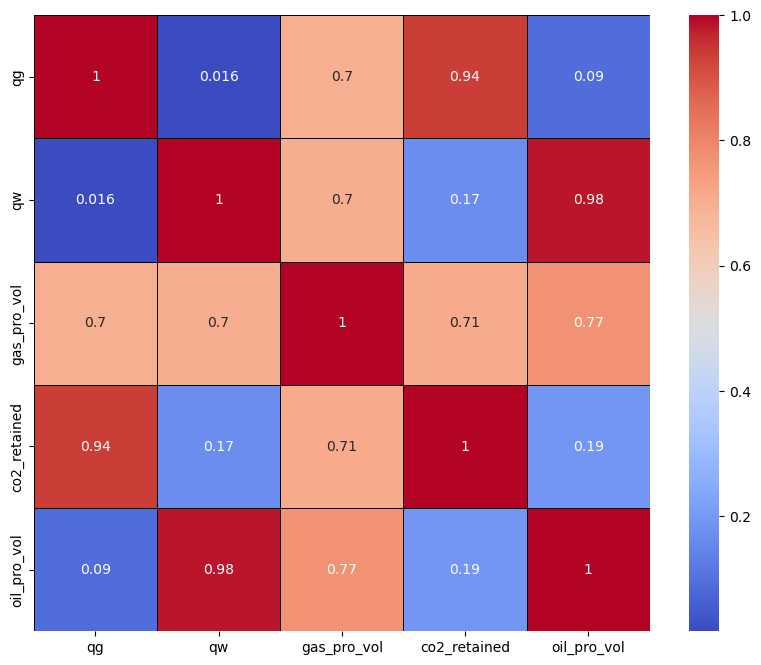

In [10]:
# Heatmap to check correlations between features

# Get pearson correlations
cor = wag_7.corr(method='pearson')

# Build the plot
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cor, annot=True, square=True, linecolor="black", lw=0.6, cmap="coolwarm", ax=ax)
plt.show()

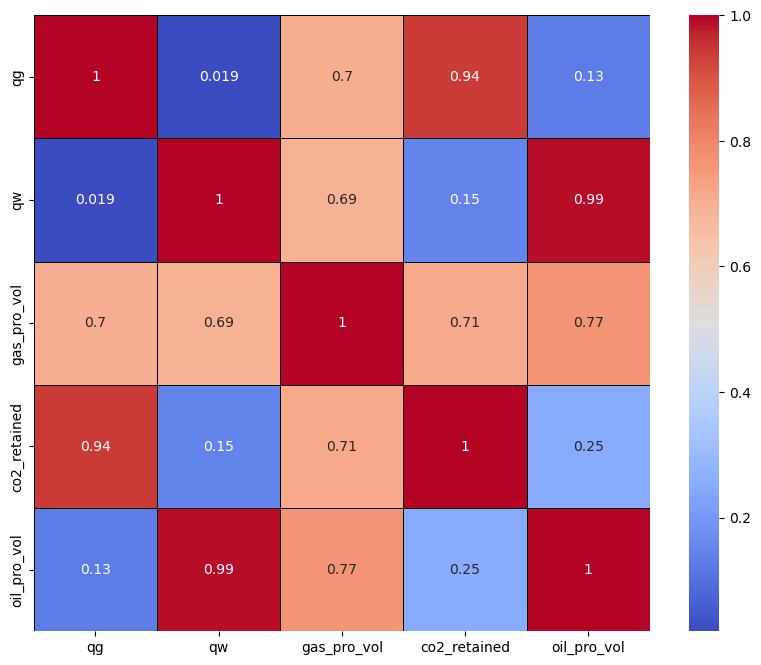

In [11]:
# Heatmap to check correlations bewteen features

# Get spearman correlations
cor = wag_7.corr(method='spearman')

# Build the plot
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cor, annot=True, square=True, linecolor="black", lw=0.6, cmap="coolwarm", ax=ax)
plt.show()

## 2.2. Check for Outliers

{'qg': [], 'qw': [], 'gas_pro_vol': [], 'co2_retained': [], 'oil_pro_vol': []}


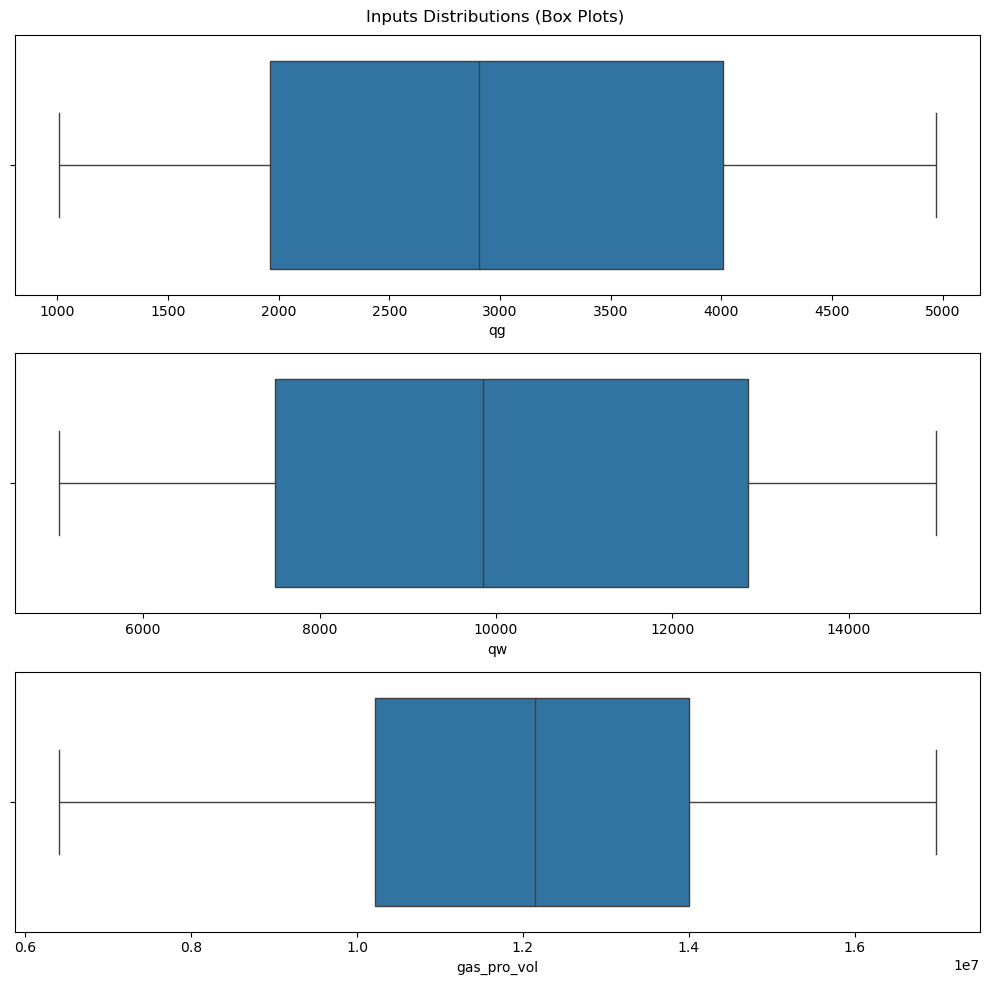

In [12]:
# Check if outliers exist

# check outliers using z-score
# Define a function to detect outliers
def detect_outliers_for_columns(data, columns):
    outliers_dict = {}
    threshold = 3

    for column_name in columns:
        if column_name in data.columns:
            data_array = data[column_name].values  # Extract the column as a NumPy array
            mean = np.mean(data_array)
            std = np.std(data_array)
            
            # Calculate outliers using the z-score
            outliers = [i for i in data_array if np.abs((i - mean) / std) > threshold]
            outliers_dict[column_name] = outliers
        else:
            print(f"Column '{column_name}' not found in the DataFrame.")
    
    return outliers_dict


# Specify the columns you are interested in
columns_of_interest = ["qg", "qw", "gas_pro_vol","co2_retained", "oil_pro_vol"]

# Detect outliers for the specified columns
outliers = detect_outliers_for_columns(wag_7, columns_of_interest)
print(outliers)

# check for outliers using boxplots
cols = wag_7.columns[:3].values 

fig, ax = plt.subplots(nrows=len(cols), figsize=(10, 10))
for axes, col in zip(ax, cols):
    sns.boxplot(x=wag_7[col], ax=axes)

fig.suptitle("Inputs Distributions (Box Plots)")
plt.tight_layout()
plt.show()

# 3. ML Algorithms Training

## 3.1.1. Data Split (Training, Testing, and Validation) - WAG (Random)

In [66]:
### Train-Test-Validation Split
# Step 1: Split initial 90% for training/testing and get the validation dataset
train_test_data, validation_data = train_test_split(wag_7, test_size=0.1, random_state=42)


# Step 2: Get train and test datasets from the remaining 90% of main dataset
train_data, test_data = train_test_split(train_test_data, test_size=0.2, random_state=42)


print("Training Data (80%):")
print(train_data.shape)

print("\nTesting Data (20%):")
print(test_data.shape)

print("\nValidation Data (10% of dataset):")
print(validation_data.shape)

Training Data (80%):
(216, 5)

Testing Data (20%):
(54, 5)

Validation Data (10% of dataset):
(30, 5)


## 3.1.2. Data Split (Training, Testing, and Validation) - WAG (LHS)

In [67]:
### Train-Test-Validation Split
# Step 1: Split initial 90% for training/testing and get the validation dataset
train_test_data_lhs, validation_data_lhs = train_test_split(wag_7_lhs, test_size=0.1, random_state=42)


# Step 2: Get train and test datasets from the remaining 90% of main dataset
train_data_lhs, test_data_lhs = train_test_split(train_test_data_lhs, test_size=0.2, random_state=42)


print("Training Data (80%):")
print(train_data_lhs.shape)

print("\nTesting Data (20%):")
print(test_data_lhs.shape)

print("\nValidation Data (10% of dataset):")
print(validation_data_lhs.shape)

Training Data (80%):
(216, 5)

Testing Data (20%):
(54, 5)

Validation Data (10% of dataset):
(30, 5)


## 3.1.3. Data Split (Training, Testing, and Validation) - SAG

In [68]:
# ## Train-Test-Validation Split
# Step 1: Split initial 90% for training/testing and get the validation dataset
train_test_sag, validation_sag = train_test_split(sag_7, test_size=0.1, random_state=42)


# Step 2: Get train and test datasets from the remaining 90% of main dataset
train_sag, test_sag = train_test_split(train_test_sag, test_size=0.2, random_state=42)


print("Training Data (80%):")
print(train_sag.shape)

print("\nTesting Data (20%):")
print(test_sag.shape)

print("\nValidation Data (10% of dataset):")
print(validation_sag.shape)

Training Data (80%):
(216, 5)

Testing Data (20%):
(54, 5)

Validation Data (10% of dataset):
(30, 5)


In [69]:
# Features variables and target variable for training, testing and validation (WAG)
# # Data with variables selected [["qg", "qw", "gas_pro_vol","co2_retained", "oil_pro_vol"]]

X_train_wag  = train_data.iloc[:, :2].values
y_train_wag_cs = train_data.iloc[:, -2].values # -2 co2_retained
y_train_wag_qo = train_data.iloc[:, -1].values # -1 oil_pro_vol
y_train_wag_qg = train_data.iloc[:, -3].values # -3 gas_prod_vol

X_test_wag = test_data.iloc[:, :2].values
y_test_wag_cs = test_data.iloc[:, -2].values
y_test_wag_qo = test_data.iloc[:, -1].values
y_test_wag_qg = test_data.iloc[:, -3].values

X_val_wag = validation_data.iloc[:, :2].values
y_val_wag_cs = validation_data.iloc[:, -2].values
y_val_wag_qo = validation_data.iloc[:, -1].values
y_val_wag_qg = validation_data.iloc[:, -3].values

# ## if you are predicting oil production, enable this line
# y_train, y_test, y_val = y_train_1, y_test_1 , y_val_1

# ## if you are predicting gas production, enable this line
# y_train, y_test, y_val = y_train_2, y_test_2 , y_val_2

print(y_train_wag_qg.shape)

print(y_test_wag_qg.shape)

print(y_val_wag_qg.shape)

(216,)
(54,)
(30,)


In [70]:
# Features variables and target variable for training, testing and validation (WAG)
# # Data with variables selected [["qg", "qw", "gas_pro_vol","co2_retained", "oil_pro_vol"]]

X_train_wag_lhs  = train_data_lhs.iloc[:, :2].values
y_train_wag_cs_lhs = train_data_lhs.iloc[:, -2].values # -2 co2_retained
y_train_wag_qo_lhs = train_data_lhs.iloc[:, -1].values # -1 oil_pro_vol
y_train_wag_qg_lhs = train_data_lhs.iloc[:, -3].values # -3 gas_prod_vol

X_test_wag_lhs = test_data_lhs.iloc[:, :2].values
y_test_wag_cs_lhs = test_data_lhs.iloc[:, -2].values
y_test_wag_qo_lhs = test_data_lhs.iloc[:, -1].values
y_test_wag_qg_lhs = test_data_lhs.iloc[:, -3].values

X_val_wag_lhs = validation_data_lhs.iloc[:, :2].values
y_val_wag_cs_lhs = validation_data_lhs.iloc[:, -2].values
y_val_wag_qo_lhs = validation_data_lhs.iloc[:, -1].values
y_val_wag_qg_lhs = validation_data_lhs.iloc[:, -3].values

# ## if you are predicting oil production, enable this line
# y_train, y_test, y_val = y_train_1, y_test_1 , y_val_1

# ## if you are predicting gas production, enable this line
# y_train, y_test, y_val = y_train_2, y_test_2 , y_val_2

print(y_train_wag_qg_lhs.shape)

print(y_test_wag_qg_lhs.shape)

print(y_val_wag_qg_lhs.shape)

(216,)
(54,)
(30,)


In [71]:
# Features variables and target variable for training, testing and validation (SAG)
# Data with variables selected [["qg", "qw", "gas_pro_vol", "oil_pro_vol"]]

X_train_sag  = train_sag.iloc[:, :2].values
y_train_sag_qo = train_sag.iloc[:, -1].values # -1 oil_pro_vol
y_train_sag_qg = train_sag.iloc[:, -3].values # -2 gas_prod_vol

X_test_sag = test_sag.iloc[:, :2].values
y_test_sag_qo = test_sag.iloc[:, -1].values
y_test_sag_qg = test_sag.iloc[:, -3].values

X_val_sag = validation_sag.iloc[:, :2].values
y_val_sag_qo = validation_sag.iloc[:, -1].values
y_val_sag_qg = validation_sag.iloc[:, -3].values


print(X_train_sag.shape)

print(y_train_sag_qo.shape)

print(X_val_sag.shape)

(216, 2)
(216,)
(30, 2)


## 3.2. Models Training, Optimization, and Evaluation without optimization (Random)

In [23]:
# Initialize regressors
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
gbr = GradientBoostingRegressor()

results_wo = {}
# Evaluate models on test data

def training_model(model, X_train, X_test, y_train, y_test, label, label_data):
    y_fit = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{label} -> R²_{label_data}: {r2:.4f},  RMSE_{label_data}: {rmse:.4f}")
    results_wo[label] = {"R²_"+label_data: r2, "RMSE_"+label_data: rmse}
    
    return r2, rmse

In [52]:
print("\n Regression metrics with test data for Oil Production (Qo):")
training_model(knn, X_train_wag, X_test_wag, y_train_wag_qo, y_test_wag_qo, "KNN_test_qo", "test")
training_model(dt, X_train_wag, X_test_wag, y_train_wag_qo, y_test_wag_qo, "DT_test_qo", "test")
training_model(rf, X_train_wag, X_test_wag, y_train_wag_qo, y_test_wag_qo, "RF_test_qo", "test")
training_model(gbr, X_train_wag, X_test_wag, y_train_wag_qo, y_test_wag_qo, "GBR_test_qo", "test")

print("\n Regression metrics with test data for Gas Production (Qg):")
training_model(knn, X_train_wag, X_test_wag, y_train_wag_qg, y_test_wag_qg, "KNN_test_qg", "test")
training_model(dt, X_train_wag, X_test_wag, y_train_wag_qg, y_test_wag_qg, "DT_test_qg", "test")
training_model(rf, X_train_wag, X_test_wag, y_train_wag_qg, y_test_wag_qg, "RF_test_qg", "test")
training_model(gbr, X_train_wag, X_test_wag, y_train_wag_qg, y_test_wag_qg, "GBR_test_qg", "test")

print("\n Regression metrics with test data for CO2 Stored (Cs):")
training_model(knn, X_train_wag, X_test_wag, y_train_wag_cs, y_test_wag_cs, "KNN_test_cs", "test")
training_model(dt, X_train_wag, X_test_wag, y_train_wag_cs, y_test_wag_cs, "DT_test_cs", "test")
training_model(rf, X_train_wag, X_test_wag, y_train_wag_cs, y_test_wag_cs, "RF_test_cs", "test")
training_model(gbr, X_train_wag, X_test_wag, y_train_wag_cs, y_test_wag_cs, "GBR_test_cs", "test")


 Regression metrics with test data for Oil Production (Qo):
KNN_test_qo -> R²_test: 0.9967,  RMSE_test: 180665.1410
DT_test_qo -> R²_test: 0.9973,  RMSE_test: 165427.1912
RF_test_qo -> R²_test: 0.9977,  RMSE_test: 151852.8916
GBR_test_qo -> R²_test: 0.9985,  RMSE_test: 121145.7193

 Regression metrics with test data for Gas Production (Qg):
KNN_test_qg -> R²_test: 0.9894,  RMSE_test: 261989.6555
DT_test_qg -> R²_test: 0.9768,  RMSE_test: 386600.6873
RF_test_qg -> R²_test: 0.9919,  RMSE_test: 228911.3826
GBR_test_qg -> R²_test: 0.9882,  RMSE_test: 276175.3287

 Regression metrics with test data for CO2 Stored (Cs):
KNN_test_cs -> R²_test: 0.9769,  RMSE_test: 78437.0652
DT_test_cs -> R²_test: 0.9820,  RMSE_test: 69198.4058
RF_test_cs -> R²_test: 0.9919,  RMSE_test: 46613.0676
GBR_test_cs -> R²_test: 0.9955,  RMSE_test: 34752.7748


(0.9954708997219258, np.float64(34752.77475336887))

In [53]:
test_results_df = pd.DataFrame(results_wo).T
test_results_df

,R²_test,RMSE_test
KNN_test_qo,0.996748,180665.141043
DT_test_qo,0.997274,165427.191205
RF_test_qo,0.997703,151852.891595
GBR_test_qo,0.998538,121145.719309
KNN_test_qg,0.989351,261989.655461
DT_test_qg,0.976811,386600.687312
RF_test_qg,0.991870,228911.382553
GBR_test_qg,0.988166,276175.328729
KNN_test_cs,0.976929,78437.065152
DT_test_cs,0.982043,69198.405840


In [54]:
results_wo = {}
print("\n Regression metrics with validation data for Oil Production (Qo):")
training_model(knn, X_train_wag, X_val_wag, y_train_wag_qo, y_val_wag_qo, "KNN_val_qo","val")
training_model(dt, X_train_wag, X_val_wag, y_train_wag_qo, y_val_wag_qo, "DT_val_qo","val")
training_model(rf, X_train_wag, X_val_wag, y_train_wag_qo, y_val_wag_qo, "RF_val_qo","val")
training_model(gbr, X_train_wag, X_val_wag, y_train_wag_qo, y_val_wag_qo, "GBR_val_qo","val")

print("\n Regression metrics with validation data for Gas Production (Qg):")
training_model(knn, X_train_wag, X_val_wag, y_train_wag_qg, y_val_wag_qg, "KNN_val_qg","val")
training_model(dt, X_train_wag, X_val_wag, y_train_wag_qg, y_val_wag_qg, "DT_val_qg","val")
training_model(rf, X_train_wag, X_val_wag, y_train_wag_qg, y_val_wag_qg, "RF_val_qg","val")
training_model(gbr, X_train_wag, X_val_wag, y_train_wag_qg, y_val_wag_qg, "GBR_val_qg","val")

print("\n Regression metrics with validation data for CO2 Stored (Cs):")
training_model(knn, X_train_wag, X_val_wag, y_train_wag_cs, y_val_wag_cs, "KNN_val_cs","val")
training_model(dt, X_train_wag, X_val_wag, y_train_wag_cs, y_val_wag_cs, "DT_val_cs","val")
training_model(rf, X_train_wag, X_val_wag, y_train_wag_cs, y_val_wag_cs, "RF_val_cs","val")
training_model(gbr, X_train_wag, X_val_wag, y_train_wag_cs, y_val_wag_cs, "GBR_val_cs","val")


 Regression metrics with validation data for Oil Production (Qo):
KNN_val_qo -> R²_val: 0.9949,  RMSE_val: 228449.8203
DT_val_qo -> R²_val: 0.9974,  RMSE_val: 165065.7333
RF_val_qo -> R²_val: 0.9976,  RMSE_val: 158283.7336
GBR_val_qo -> R²_val: 0.9984,  RMSE_val: 128257.7414

 Regression metrics with validation data for Gas Production (Qg):
KNN_val_qg -> R²_val: 0.9838,  RMSE_val: 314344.5159
DT_val_qg -> R²_val: 0.9655,  RMSE_val: 458142.1929
RF_val_qg -> R²_val: 0.9883,  RMSE_val: 267043.7315
GBR_val_qg -> R²_val: 0.9835,  RMSE_val: 317168.6779

 Regression metrics with validation data for CO2 Stored (Cs):
KNN_val_cs -> R²_val: 0.9804,  RMSE_val: 71751.3561
DT_val_cs -> R²_val: 0.9857,  RMSE_val: 61181.9409
RF_val_cs -> R²_val: 0.9918,  RMSE_val: 46349.1621
GBR_val_cs -> R²_val: 0.9948,  RMSE_val: 36836.2605


(0.9948343242243148, np.float64(36836.26050653123))

In [55]:
val_results_df = pd.DataFrame(results_wo).T
val_results_df

,R²_val,RMSE_val
KNN_val_qo,0.994946,228449.820279
DT_val_qo,0.997362,165065.733339
RF_val_qo,0.997574,158283.733571
GBR_val_qo,0.998407,128257.741378
KNN_val_qg,0.983754,314344.515908
DT_val_qg,0.965490,458142.192883
RF_val_qg,0.988275,267043.731487
GBR_val_qg,0.983460,317168.677930
KNN_val_cs,0.980401,71751.356131
DT_val_cs,0.985750,61181.940933


In [56]:
wag_df_ran = pd.concat([test_results_df, val_results_df], axis=1)
wag_df_ran

,R²_test,RMSE_test,R²_val,RMSE_val
KNN_test_qo,0.996748,180665.141043,NaN,NaN
DT_test_qo,0.997274,165427.191205,NaN,NaN
RF_test_qo,0.997703,151852.891595,NaN,NaN
GBR_test_qo,0.998538,121145.719309,NaN,NaN
KNN_test_qg,0.989351,261989.655461,NaN,NaN
DT_test_qg,0.976811,386600.687312,NaN,NaN
RF_test_qg,0.991870,228911.382553,NaN,NaN
GBR_test_qg,0.988166,276175.328729,NaN,NaN
KNN_test_cs,0.976929,78437.065152,NaN,NaN
DT_test_cs,0.982043,69198.405840,NaN,NaN


In [57]:
# Reset the index to expose the row labels as a column
wag_df_ran = wag_df_ran.reset_index()

# Extract model names (KNN, DT, RF, GBR) from the 'index' column
wag_df_ran['Models'] = wag_df_ran['index'].str.extract(r'^(KNN|DT|RF|GBR)')

# Extract property suffixes (e.g., "_test_qo") from the index
wag_df_ran['Property'] = wag_df_ran['index'].str.replace(r'^(KNN|DT|RF|GBR)_', '', regex=True)

# Pivot the DataFrame to reorganize by models
wag_df_ran = wag_df_ran.pivot(index='Models', columns='Property', values=list(wag_df_ran.columns.drop(['index', 'Models', 'Property'])))

# Flatten hierarchical column names and format them correctly
wag_df_ran.columns = [f"{col[1]}_{col[0]}" for col in wag_df_ran.columns]

# Reset index to get 'Models' as a column
wag_df_ran.reset_index(inplace=True)

wag_df_ran

,Models,test_cs_R²_test,test_qg_R²_test,test_qo_R²_test,val_cs_R²_test,val_qg_R²_test,val_qo_R²_test,test_cs_RMSE_test,test_qg_RMSE_test,test_qo_RMSE_test,...,test_qo_R²_val,val_cs_R²_val,val_qg_R²_val,val_qo_R²_val,test_cs_RMSE_val,test_qg_RMSE_val,test_qo_RMSE_val,val_cs_RMSE_val,val_qg_RMSE_val,val_qo_RMSE_val
0,DT,0.982043,0.976811,0.997274,NaN,NaN,NaN,69198.405840,386600.687312,165427.191205,...,NaN,0.985750,0.965490,0.997362,NaN,NaN,NaN,61181.940933,458142.192883,165065.733339
1,GBR,0.995471,0.988166,0.998538,NaN,NaN,NaN,34752.774753,276175.328729,121145.719309,...,NaN,0.994834,0.983460,0.998407,NaN,NaN,NaN,36836.260507,317168.677930,128257.741378
2,KNN,0.976929,0.989351,0.996748,NaN,NaN,NaN,78437.065152,261989.655461,180665.141043,...,NaN,0.980401,0.983754,0.994946,NaN,NaN,NaN,71751.356131,314344.515908,228449.820279
3,RF,0.991852,0.991870,0.997703,NaN,NaN,NaN,46613.067642,228911.382553,151852.891595,...,NaN,0.991822,0.988275,0.997574,NaN,NaN,NaN,46349.162141,267043.731487,158283.733571


In [58]:
wag_df_ran.to_csv("results/wag_7_ran.csv")

## 3.3. Models Training, Optimization, and Evaluation without optimization (LHS)

In [59]:
results_wo = {}

print("\n Regression metrics with test data for Oil Production (Qo):")
training_model(knn, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_qo_lhs, y_test_wag_qo_lhs, "KNN_test_qo", "test")
training_model(dt, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_qo_lhs, y_test_wag_qo_lhs, "DT_test_qo", "test")
training_model(rf, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_qo_lhs, y_test_wag_qo_lhs, "RF_test_qo", "test")
training_model(gbr, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_qo_lhs, y_test_wag_qo_lhs, "GBR_test_qo", "test")

print("\n Regression metrics with test data for Gas Production (Qg):")
training_model(knn, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_qg_lhs, y_test_wag_qg_lhs, "KNN_test_qg", "test")
training_model(dt, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_qg_lhs, y_test_wag_qg_lhs, "DT_test_qg", "test")
training_model(rf, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_qg_lhs, y_test_wag_qg_lhs, "RF_test_qg", "test")
training_model(gbr, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_qg_lhs, y_test_wag_qg_lhs, "GBR_test_qg", "test")

print("\n Regression metrics with test data for CO2 Stored (Cs):")
training_model(knn, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_cs_lhs, y_test_wag_cs_lhs, "KNN_test_cs", "test")
training_model(dt, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_cs_lhs, y_test_wag_cs_lhs, "DT_test_cs", "test")
training_model(rf, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_cs_lhs, y_test_wag_cs_lhs, "RF_test_cs", "test")
training_model(gbr, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_cs_lhs, y_test_wag_cs_lhs, "GBR_test_cs", "test")


 Regression metrics with test data for Oil Production (Qo):
KNN_test_qo -> R²_test: 0.9972,  RMSE_test: 159520.0991
DT_test_qo -> R²_test: 0.9961,  RMSE_test: 186777.5628
RF_test_qo -> R²_test: 0.9964,  RMSE_test: 180535.4590
GBR_test_qo -> R²_test: 0.9972,  RMSE_test: 157720.5359

 Regression metrics with test data for Gas Production (Qg):
KNN_test_qg -> R²_test: 0.9888,  RMSE_test: 272417.5830
DT_test_qg -> R²_test: 0.9802,  RMSE_test: 362944.6107
RF_test_qg -> R²_test: 0.9953,  RMSE_test: 175862.3521
GBR_test_qg -> R²_test: 0.9911,  RMSE_test: 242867.0626

 Regression metrics with test data for CO2 Stored (Cs):
KNN_test_cs -> R²_test: 0.9725,  RMSE_test: 87641.6940
DT_test_cs -> R²_test: 0.9857,  RMSE_test: 63216.4993
RF_test_cs -> R²_test: 0.9916,  RMSE_test: 48584.1802
GBR_test_cs -> R²_test: 0.9920,  RMSE_test: 47241.4732


(0.9920182406476739, np.float64(47241.473211928955))

In [60]:
test_results_df_lhs = pd.DataFrame(results_wo).T
test_results_df_lhs

,R²_test,RMSE_test
KNN_test_qo,0.997176,159520.099093
DT_test_qo,0.996128,186777.562834
RF_test_qo,0.996382,180535.458953
GBR_test_qo,0.997239,157720.535852
KNN_test_qg,0.988825,272417.583029
DT_test_qg,0.980164,362944.610711
RF_test_qg,0.995343,175862.352117
GBR_test_qg,0.991118,242867.062550
KNN_test_cs,0.972529,87641.694037
DT_test_cs,0.985707,63216.499314


In [61]:
results_wo = {}
print("\n Regression metrics with validation data for Oil Production (Qo):")
training_model(knn, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_qo_lhs, y_val_wag_qo_lhs, "KNN_val_qo","val")
training_model(dt, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_qo_lhs, y_val_wag_qo_lhs, "DT_val_qo","val")
training_model(rf, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_qo_lhs, y_val_wag_qo_lhs, "RF_val_qo","val")
training_model(gbr, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_qo_lhs, y_val_wag_qo_lhs, "GBR_val_qo","val")

print("\n Regression metrics with validation data for Gas Production (Qg):")
training_model(knn, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_qg_lhs, y_val_wag_qg_lhs, "KNN_val_qg","val")
training_model(dt, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_qg_lhs, y_val_wag_qg_lhs, "DT_val_qg","val")
training_model(rf, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_qg_lhs, y_val_wag_qg_lhs, "RF_val_qg","val")
training_model(gbr, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_qg_lhs, y_val_wag_qg_lhs, "GBR_val_qg","val")

print("\n Regression metrics with validation data for CO2 Stored (Cs):")
training_model(knn, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_cs_lhs, y_val_wag_cs_lhs, "KNN_val_cs","val")
training_model(dt, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_cs_lhs, y_val_wag_cs_lhs, "DT_val_cs","val")
training_model(rf, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_cs_lhs, y_val_wag_cs_lhs, "RF_val_cs","val")
training_model(gbr, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_cs_lhs, y_val_wag_cs_lhs, "GBR_val_cs","val")


 Regression metrics with validation data for Oil Production (Qo):
KNN_val_qo -> R²_val: 0.9972,  RMSE_val: 189352.3267
DT_val_qo -> R²_val: 0.9980,  RMSE_val: 159370.9744
RF_val_qo -> R²_val: 0.9984,  RMSE_val: 143277.5497
GBR_val_qo -> R²_val: 0.9990,  RMSE_val: 112659.1064

 Regression metrics with validation data for Gas Production (Qg):
KNN_val_qg -> R²_val: 0.9830,  RMSE_val: 343413.5926
DT_val_qg -> R²_val: 0.9896,  RMSE_val: 268833.3850
RF_val_qg -> R²_val: 0.9908,  RMSE_val: 253081.6067
GBR_val_qg -> R²_val: 0.9923,  RMSE_val: 231006.2040

 Regression metrics with validation data for CO2 Stored (Cs):
KNN_val_cs -> R²_val: 0.9689,  RMSE_val: 98690.9659
DT_val_cs -> R²_val: 0.9738,  RMSE_val: 90613.9204
RF_val_cs -> R²_val: 0.9866,  RMSE_val: 64698.7646
GBR_val_cs -> R²_val: 0.9932,  RMSE_val: 46092.1536


(0.9932110370873273, np.float64(46092.15364639241))

In [62]:
val_results_df_lhs = pd.DataFrame(results_wo).T
val_results_df_lhs

,R²_val,RMSE_val
KNN_val_qo,0.997162,189352.326701
DT_val_qo,0.997990,159370.974363
RF_val_qo,0.998375,143277.549750
GBR_val_qo,0.998996,112659.106418
KNN_val_qg,0.983040,343413.592605
DT_val_qg,0.989606,268833.384989
RF_val_qg,0.990789,253081.606712
GBR_val_qg,0.992326,231006.204046
KNN_val_cs,0.968875,98690.965871
DT_val_cs,0.973761,90613.920393


In [63]:
wag_df_lhs = pd.concat([test_results_df_lhs, val_results_df_lhs], axis=1)
wag_df_lhs

,R²_test,RMSE_test,R²_val,RMSE_val
KNN_test_qo,0.997176,159520.099093,NaN,NaN
DT_test_qo,0.996128,186777.562834,NaN,NaN
RF_test_qo,0.996382,180535.458953,NaN,NaN
GBR_test_qo,0.997239,157720.535852,NaN,NaN
KNN_test_qg,0.988825,272417.583029,NaN,NaN
DT_test_qg,0.980164,362944.610711,NaN,NaN
RF_test_qg,0.995343,175862.352117,NaN,NaN
GBR_test_qg,0.991118,242867.062550,NaN,NaN
KNN_test_cs,0.972529,87641.694037,NaN,NaN
DT_test_cs,0.985707,63216.499314,NaN,NaN


In [64]:
# Reset the index to expose the row labels as a column
wag_df_lhs = wag_df_lhs.reset_index()

# Extract model names (KNN, DT, RF, GBR) from the 'index' column
wag_df_lhs['Models'] = wag_df_lhs['index'].str.extract(r'^(KNN|DT|RF|GBR)')

# Extract property suffixes (e.g., "_test_qo") from the index
wag_df_lhs['Property'] = wag_df_lhs['index'].str.replace(r'^(KNN|DT|RF|GBR)_', '', regex=True)

# Pivot the DataFrame to reorganize by models
wag_df_lhs = wag_df_lhs.pivot(index='Models', columns='Property', values=list(wag_df_lhs.columns.drop(['index', 'Models', 'Property'])))

# Flatten hierarchical column names and format them correctly
wag_df_lhs.columns = [f"{col[1]}_{col[0]}" for col in wag_df_lhs.columns]

# Reset index to get 'Models' as a column
wag_df_lhs.reset_index(inplace=True)

In [65]:
wag_df_lhs

,Models,test_cs_R²_test,test_qg_R²_test,test_qo_R²_test,val_cs_R²_test,val_qg_R²_test,val_qo_R²_test,test_cs_RMSE_test,test_qg_RMSE_test,test_qo_RMSE_test,...,test_qo_R²_val,val_cs_R²_val,val_qg_R²_val,val_qo_R²_val,test_cs_RMSE_val,test_qg_RMSE_val,test_qo_RMSE_val,val_cs_RMSE_val,val_qg_RMSE_val,val_qo_RMSE_val
0,DT,0.985707,0.980164,0.996128,NaN,NaN,NaN,63216.499314,362944.610711,186777.562834,...,NaN,0.973761,0.989606,0.997990,NaN,NaN,NaN,90613.920393,268833.384989,159370.974363
1,GBR,0.992018,0.991118,0.997239,NaN,NaN,NaN,47241.473212,242867.062550,157720.535852,...,NaN,0.993211,0.992326,0.998996,NaN,NaN,NaN,46092.153646,231006.204046,112659.106418
2,KNN,0.972529,0.988825,0.997176,NaN,NaN,NaN,87641.694037,272417.583029,159520.099093,...,NaN,0.968875,0.983040,0.997162,NaN,NaN,NaN,98690.965871,343413.592605,189352.326701
3,RF,0.991558,0.995343,0.996382,NaN,NaN,NaN,48584.180157,175862.352117,180535.458953,...,NaN,0.986624,0.990789,0.998375,NaN,NaN,NaN,64698.764612,253081.606712,143277.549750


In [66]:
wag_df_lhs.to_csv("results/wag_7_lhs.csv")

## 3.3. Models Training, Optimization, and Evaluation (RandomizedSearchCV) - Random

In [67]:
# Call the Machine Learning Algorithms for regression
knn = KNeighborsRegressor()
gbr = GradientBoostingRegressor()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)

In [25]:
# Define the hyperparameters to tune for each algorithm
knn_params = {'n_neighbors': np.arange(1, 31, 1)}
dt_params = {'max_depth': np.arange(2,20,1)}
gbr_params = {'n_estimators': np.arange(100, 1001, 100), "max_depth":[3, 5, 7]}
rf_params = {'max_depth': np.arange(5, 30, 1)}

In [69]:
# Function to train each model
results_ran = {}

def training_model_RS(model_name, param_grid, X_train, X_test, y_train, y_test, label, label_data):
    model = RandomizedSearchCV(model_name, n_iter=50, param_distributions=param_grid, scoring="r2", random_state=42)
    y_fit = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{label} -> R²_{label_data}: {r2:.4f},  RMSE_{label_data}: {rmse:.4f}")
    results_ran[label] = {"R²_"+label_data: r2, "RMSE_"+label_data: rmse}
    
    return r2, rmse

In [70]:
print("\n Regression metrics with test data for Oil Production (Qo) using RandomizedSearchCV:")
training_model_RS(knn, knn_params, X_train_wag, X_test_wag, y_train_wag_qo, y_test_wag_qo, "KNN_test_qo", "test")
training_model_RS(dt, dt_params, X_train_wag, X_test_wag, y_train_wag_qo, y_test_wag_qo, "DT_test_qo", "test")
training_model_RS(rf, rf_params, X_train_wag, X_test_wag, y_train_wag_qo, y_test_wag_qo, "RF_test_qo", "test")
training_model_RS(gbr, gbr_params, X_train_wag, X_test_wag, y_train_wag_qo, y_test_wag_qo, "GBR_test_qo", "test")

print("\n Regression metrics with test data for Gas Production (Qg) using RandomizedSearchCV:")
training_model_RS(knn, knn_params, X_train_wag, X_test_wag, y_train_wag_qg, y_test_wag_qg, "KNN_test_qg", "test")
training_model_RS(dt, dt_params, X_train_wag, X_test_wag, y_train_wag_qg, y_test_wag_qg, "DT_test_qg", "test")
training_model_RS(rf, rf_params, X_train_wag, X_test_wag, y_train_wag_qg, y_test_wag_qg, "RF_test_qg", "test")
training_model_RS(gbr, gbr_params, X_train_wag, X_test_wag, y_train_wag_qg, y_test_wag_qg, "GBR_test_qg", "test")

print("\n Regression metrics with test data for CO2 Stored (Cs) using RandomizedSearchCV:")
training_model_RS(knn, knn_params, X_train_wag, X_test_wag, y_train_wag_cs, y_test_wag_cs, "KNN_test_cs", "test")
training_model_RS(dt, dt_params, X_train_wag, X_test_wag, y_train_wag_cs, y_test_wag_cs, "DT_test_cs", "test")
training_model_RS(rf, rf_params, X_train_wag, X_test_wag, y_train_wag_cs, y_test_wag_cs, "RF_test_cs", "test")
training_model_RS(gbr, gbr_params, X_train_wag, X_test_wag, y_train_wag_cs, y_test_wag_cs, "GBR_test_cs", "test")


 Regression metrics with test data for Oil Production (Qo) using RandomizedSearchCV:
KNN_test_qo -> R²_test: 0.9965,  RMSE_test: 187976.0938
DT_test_qo -> R²_test: 0.9974,  RMSE_test: 161220.7109
RF_test_qo -> R²_test: 0.9977,  RMSE_test: 150862.8629
GBR_test_qo -> R²_test: 0.9987,  RMSE_test: 113333.9206

 Regression metrics with test data for Gas Production (Qg) using RandomizedSearchCV:
KNN_test_qg -> R²_test: 0.9930,  RMSE_test: 212113.7743
DT_test_qg -> R²_test: 0.9738,  RMSE_test: 411089.4845
RF_test_qg -> R²_test: 0.9919,  RMSE_test: 228492.9808
GBR_test_qg -> R²_test: 0.9900,  RMSE_test: 253391.2616

 Regression metrics with test data for CO2 Stored (Cs) using RandomizedSearchCV:
KNN_test_cs -> R²_test: 0.9845,  RMSE_test: 64187.6758
DT_test_cs -> R²_test: 0.9803,  RMSE_test: 72486.2287
RF_test_cs -> R²_test: 0.9919,  RMSE_test: 46613.0676
GBR_test_cs -> R²_test: 0.9962,  RMSE_test: 31907.7530


(0.9961820924362689, np.float64(31907.753037592698))

In [71]:
test_results_df_Ran_ran = pd.DataFrame(results_ran).T
test_results_df_Ran_ran

,R²_test,RMSE_test
KNN_test_qo,0.996480,187976.093819
DT_test_qo,0.997411,161220.710933
RF_test_qo,0.997733,150862.862941
GBR_test_qo,0.998720,113333.920642
KNN_test_qg,0.993019,212113.774331
DT_test_qg,0.973780,411089.484502
RF_test_qg,0.991900,228492.980755
GBR_test_qg,0.990038,253391.261622
KNN_test_cs,0.984550,64187.675763
DT_test_cs,0.980296,72486.228703


In [72]:
results_ran = {}
print("\n Regression metrics with validation data for Oil Production (Qo) using RandomizedSearchCV:")
training_model_RS(knn, knn_params, X_train_wag, X_val_wag, y_train_wag_qo, y_val_wag_qo, "KNN_val_qo","val")
training_model_RS(dt, dt_params, X_train_wag, X_val_wag, y_train_wag_qo, y_val_wag_qo, "DT_val_qo","val")
training_model_RS(rf, rf_params, X_train_wag, X_val_wag, y_train_wag_qo, y_val_wag_qo, "RF_val_qo","val")
training_model_RS(gbr, gbr_params, X_train_wag, X_val_wag, y_train_wag_qo, y_val_wag_qo, "GBR_val_qo","val")

print("\n Regression metrics with validation data for Gas Production (Qg) using RandomizedSearchCV:")
training_model_RS(knn, knn_params, X_train_wag, X_val_wag, y_train_wag_qg, y_val_wag_qg, "KNN_val_qg","val")
training_model_RS(dt, dt_params, X_train_wag, X_val_wag, y_train_wag_qg, y_val_wag_qg, "DT_val_qg","val")
training_model_RS(rf, rf_params, X_train_wag, X_val_wag, y_train_wag_qg, y_val_wag_qg, "RF_val_qg","val")
training_model_RS(gbr, gbr_params, X_train_wag, X_val_wag, y_train_wag_qg, y_val_wag_qg, "GBR_val_qg","val")

print("\n Regression metrics with validation data for CO2 Stored (Cs) using RandomizedSearchCV:")
training_model_RS(knn, knn_params, X_train_wag, X_val_wag, y_train_wag_cs, y_val_wag_cs, "KNN_val_cs","val")
training_model_RS(dt, dt_params, X_train_wag, X_val_wag, y_train_wag_cs, y_val_wag_cs, "DT_val_cs","val")
training_model_RS(rf, rf_params, X_train_wag, X_val_wag, y_train_wag_cs, y_val_wag_cs, "RF_val_cs","val")
training_model_RS(gbr, gbr_params, X_train_wag, X_val_wag, y_train_wag_cs, y_val_wag_cs, "GBR_val_cs","val")


 Regression metrics with validation data for Oil Production (Qo) using RandomizedSearchCV:
KNN_val_qo -> R²_val: 0.9956,  RMSE_val: 212923.7838
DT_val_qo -> R²_val: 0.9968,  RMSE_val: 182888.2435
RF_val_qo -> R²_val: 0.9976,  RMSE_val: 156134.0616
GBR_val_qo -> R²_val: 0.9989,  RMSE_val: 108927.4196

 Regression metrics with validation data for Gas Production (Qg) using RandomizedSearchCV:
KNN_val_qg -> R²_val: 0.9835,  RMSE_val: 316761.8572
DT_val_qg -> R²_val: 0.9708,  RMSE_val: 421207.7471
RF_val_qg -> R²_val: 0.9885,  RMSE_val: 264732.2536
GBR_val_qg -> R²_val: 0.9848,  RMSE_val: 303962.3335

 Regression metrics with validation data for CO2 Stored (Cs) using RandomizedSearchCV:
KNN_val_cs -> R²_val: 0.9784,  RMSE_val: 75366.4003
DT_val_cs -> R²_val: 0.9861,  RMSE_val: 60471.2553
RF_val_cs -> R²_val: 0.9918,  RMSE_val: 46349.1621
GBR_val_cs -> R²_val: 0.9953,  RMSE_val: 35005.8210


(0.9953349467317232, np.float64(35005.82095331375))

In [73]:
val_results_df_Ran_ran = pd.DataFrame(results_ran).T
val_results_df_Ran_ran

,R²_val,RMSE_val
KNN_val_qo,0.995610,212923.783781
DT_val_qo,0.996761,182888.243541
RF_val_qo,0.997639,156134.061555
GBR_val_qo,0.998851,108927.419561
KNN_val_qg,0.983503,316761.857182
DT_val_qg,0.970830,421207.747143
RF_val_qg,0.988477,264732.253558
GBR_val_qg,0.984809,303962.333493
KNN_val_cs,0.978376,75366.400266
DT_val_cs,0.986079,60471.255260


In [74]:
wag_df_ran_ran = pd.concat([test_results_df_Ran_ran, val_results_df_Ran_ran], axis=1)
wag_df_ran_ran

,R²_test,RMSE_test,R²_val,RMSE_val
KNN_test_qo,0.996480,187976.093819,NaN,NaN
DT_test_qo,0.997411,161220.710933,NaN,NaN
RF_test_qo,0.997733,150862.862941,NaN,NaN
GBR_test_qo,0.998720,113333.920642,NaN,NaN
KNN_test_qg,0.993019,212113.774331,NaN,NaN
DT_test_qg,0.973780,411089.484502,NaN,NaN
RF_test_qg,0.991900,228492.980755,NaN,NaN
GBR_test_qg,0.990038,253391.261622,NaN,NaN
KNN_test_cs,0.984550,64187.675763,NaN,NaN
DT_test_cs,0.980296,72486.228703,NaN,NaN


In [75]:
# Reset the index to expose the row labels as a column
wag_df_ran_ran = wag_df_ran_ran.reset_index()

# Extract model names (KNN, DT, RF, GBR) from the 'index' column
wag_df_ran_ran['Models'] = wag_df_ran_ran['index'].str.extract(r'^(KNN|DT|RF|GBR)')

# Extract property suffixes (e.g., "_test_qo") from the index
wag_df_ran_ran['Property'] = wag_df_ran_ran['index'].str.replace(r'^(KNN|DT|RF|GBR)_', '', regex=True)

# Pivot the DataFrame to reorganize by models
wag_df_ran_ran = wag_df_ran_ran.pivot(index='Models', columns='Property', values=list(wag_df_ran_ran.columns.drop(['index', 'Models', 'Property'])))

# Flatten hierarchical column names and format them correctly
wag_df_ran_ran.columns = [f"{col[1]}_{col[0]}" for col in wag_df_ran_ran.columns]

# Reset index to get 'Models' as a column
wag_df_ran_ran.reset_index(inplace=True)

wag_df_ran_ran

,Models,test_cs_R²_test,test_qg_R²_test,test_qo_R²_test,val_cs_R²_test,val_qg_R²_test,val_qo_R²_test,test_cs_RMSE_test,test_qg_RMSE_test,test_qo_RMSE_test,...,test_qo_R²_val,val_cs_R²_val,val_qg_R²_val,val_qo_R²_val,test_cs_RMSE_val,test_qg_RMSE_val,test_qo_RMSE_val,val_cs_RMSE_val,val_qg_RMSE_val,val_qo_RMSE_val
0,DT,0.980296,0.973780,0.997411,NaN,NaN,NaN,72486.228703,411089.484502,161220.710933,...,NaN,0.986079,0.970830,0.996761,NaN,NaN,NaN,60471.255260,421207.747143,182888.243541
1,GBR,0.996182,0.990038,0.998720,NaN,NaN,NaN,31907.753038,253391.261622,113333.920642,...,NaN,0.995335,0.984809,0.998851,NaN,NaN,NaN,35005.820953,303962.333493,108927.419561
2,KNN,0.984550,0.993019,0.996480,NaN,NaN,NaN,64187.675763,212113.774331,187976.093819,...,NaN,0.978376,0.983503,0.995610,NaN,NaN,NaN,75366.400266,316761.857182,212923.783781
3,RF,0.991852,0.991900,0.997733,NaN,NaN,NaN,46613.067642,228492.980755,150862.862941,...,NaN,0.991822,0.988477,0.997639,NaN,NaN,NaN,46349.162141,264732.253558,156134.061555


In [76]:
wag_df_ran_ran.to_csv("results/wag_7_ran_ran.csv")

## 3.4. Models Training, Optimization, and Evaluation (RandomizedSearchCV) - LHS

In [77]:
results_ran = {}

print("\n Regression metrics with test data for Oil Production (Qo) using RandomizedSearchCV:")
training_model_RS(knn, knn_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_qo_lhs, y_test_wag_qo_lhs, "KNN_test_qo", "test")
training_model_RS(dt, dt_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_qo_lhs, y_test_wag_qo_lhs, "DT_test_qo", "test")
training_model_RS(rf, rf_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_qo_lhs, y_test_wag_qo_lhs, "RF_test_qo", "test")
training_model_RS(gbr, gbr_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_qo_lhs, y_test_wag_qo_lhs, "GBR_test_qo", "test")

print("\n Regression metrics with test data for Gas Production (Qg) using RandomizedSearchCV:")
training_model_RS(knn, knn_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_qg_lhs, y_test_wag_qg_lhs, "KNN_test_qg", "test")
training_model_RS(dt, dt_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_qg_lhs, y_test_wag_qg_lhs, "DT_test_qg", "test")
training_model_RS(rf, rf_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_qg_lhs, y_test_wag_qg_lhs, "RF_test_qg", "test")
training_model_RS(gbr, gbr_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_qg_lhs, y_test_wag_qg_lhs, "GBR_test_qg", "test")

print("\n Regression metrics with test data for CO2 Stored (Cs) using RandomizedSearchCV:")
training_model_RS(knn, knn_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_cs_lhs, y_test_wag_cs_lhs, "KNN_test_cs", "test")
training_model_RS(dt, dt_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_cs_lhs, y_test_wag_cs_lhs, "DT_test_cs", "test")
training_model_RS(rf, rf_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_cs_lhs, y_test_wag_cs_lhs, "RF_test_cs", "test")
training_model_RS(gbr, gbr_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_cs_lhs, y_test_wag_cs_lhs, "GBR_test_cs", "test")


 Regression metrics with test data for Oil Production (Qo) using RandomizedSearchCV:
KNN_test_qo -> R²_test: 0.9969,  RMSE_test: 168112.6131
DT_test_qo -> R²_test: 0.9947,  RMSE_test: 219342.5791
RF_test_qo -> R²_test: 0.9963,  RMSE_test: 183702.7038
GBR_test_qo -> R²_test: 0.9979,  RMSE_test: 137876.6340

 Regression metrics with test data for Gas Production (Qg) using RandomizedSearchCV:
KNN_test_qg -> R²_test: 0.9881,  RMSE_test: 281396.6774
DT_test_qg -> R²_test: 0.9814,  RMSE_test: 351336.4136
RF_test_qg -> R²_test: 0.9950,  RMSE_test: 182338.2679
GBR_test_qg -> R²_test: 0.9932,  RMSE_test: 212627.6022

 Regression metrics with test data for CO2 Stored (Cs) using RandomizedSearchCV:
KNN_test_cs -> R²_test: 0.9801,  RMSE_test: 74542.9910
DT_test_cs -> R²_test: 0.9827,  RMSE_test: 69542.0764
RF_test_cs -> R²_test: 0.9916,  RMSE_test: 48584.1802
GBR_test_cs -> R²_test: 0.9936,  RMSE_test: 42268.6396


(0.9936101846769865, np.float64(42268.639637233704))

In [78]:
test_results_df_Ran_lhs = pd.DataFrame(results_ran).T
test_results_df_Ran_lhs

,R²_test,RMSE_test
KNN_test_qo,0.996863,168112.613127
DT_test_qo,0.994660,219342.579063
RF_test_qo,0.996254,183702.703832
GBR_test_qo,0.997890,137876.633990
KNN_test_qg,0.988077,281396.677443
DT_test_qg,0.981413,351336.413567
RF_test_qg,0.994994,182338.267907
GBR_test_qg,0.993192,212627.602228
KNN_test_cs,0.980127,74542.990965
DT_test_cs,0.982704,69542.076443


In [79]:
results_ran = {}
print("\n Regression metrics with validation data for Oil Production (Qo) using RandomizedSearchCV:")
training_model_RS(knn, knn_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_qo_lhs, y_val_wag_qo_lhs, "KNN_val_qo","val")
training_model_RS(dt, dt_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_qo_lhs, y_val_wag_qo_lhs, "DT_val_qo","val")
training_model_RS(rf, rf_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_qo_lhs, y_val_wag_qo_lhs, "RF_val_qo","val")
training_model_RS(gbr, gbr_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_qo_lhs, y_val_wag_qo_lhs, "GBR_val_qo","val")

print("\n Regression metrics with validation data for Gas Production (Qg) using RandomizedSearchCV:")
training_model_RS(knn, knn_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_qg_lhs, y_val_wag_qg_lhs, "KNN_val_qg","val")
training_model_RS(dt, dt_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_qg_lhs, y_val_wag_qg_lhs, "DT_val_qg","val")
training_model_RS(rf, rf_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_qg_lhs, y_val_wag_qg_lhs, "RF_val_qg","val")
training_model_RS(gbr, gbr_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_qg_lhs, y_val_wag_qg_lhs, "GBR_val_qg","val")

print("\n Regression metrics with validation data for CO2 Stored (Cs) using RandomizedSearchCV:")
training_model_RS(knn, knn_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_cs_lhs, y_val_wag_cs_lhs, "KNN_val_cs","val")
training_model_RS(dt, dt_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_cs_lhs, y_val_wag_cs_lhs, "DT_val_cs","val")
training_model_RS(rf, rf_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_cs_lhs, y_val_wag_cs_lhs, "RF_val_cs","val")
training_model_RS(gbr, gbr_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_cs_lhs, y_val_wag_cs_lhs, "GBR_val_cs","val")


 Regression metrics with validation data for Oil Production (Qo) using RandomizedSearchCV:
KNN_val_qo -> R²_val: 0.9972,  RMSE_val: 189520.7439
DT_val_qo -> R²_val: 0.9984,  RMSE_val: 140344.7551
RF_val_qo -> R²_val: 0.9984,  RMSE_val: 142716.1804
GBR_val_qo -> R²_val: 0.9991,  RMSE_val: 108625.4564

 Regression metrics with validation data for Gas Production (Qg) using RandomizedSearchCV:
KNN_val_qg -> R²_val: 0.9810,  RMSE_val: 363721.6809
DT_val_qg -> R²_val: 0.9859,  RMSE_val: 313488.5821
RF_val_qg -> R²_val: 0.9906,  RMSE_val: 256023.6579
GBR_val_qg -> R²_val: 0.9945,  RMSE_val: 195843.1765

 Regression metrics with validation data for CO2 Stored (Cs) using RandomizedSearchCV:
KNN_val_cs -> R²_val: 0.9657,  RMSE_val: 103644.7348
DT_val_cs -> R²_val: 0.9736,  RMSE_val: 90937.9735
RF_val_cs -> R²_val: 0.9866,  RMSE_val: 64698.7646
GBR_val_cs -> R²_val: 0.9949,  RMSE_val: 40030.5305


(0.9948792670717549, np.float64(40030.530513757665))

In [80]:
val_results_df_Ran_lhs = pd.DataFrame(results_ran).T
val_results_df_Ran_lhs

,R²_val,RMSE_val
KNN_val_qo,0.997157,189520.743885
DT_val_qo,0.998441,140344.755070
RF_val_qo,0.998388,142716.180421
GBR_val_qo,0.999066,108625.456450
KNN_val_qg,0.980974,363721.680864
DT_val_qg,0.985867,313488.582145
RF_val_qg,0.990573,256023.657897
GBR_val_qg,0.994484,195843.176519
KNN_val_cs,0.965672,103644.734827
DT_val_cs,0.973573,90937.973524


In [81]:
wag_df_ran_lhs = pd.concat([test_results_df_Ran_lhs, val_results_df_Ran_lhs], axis=1)
wag_df_ran_lhs

,R²_test,RMSE_test,R²_val,RMSE_val
KNN_test_qo,0.996863,168112.613127,NaN,NaN
DT_test_qo,0.994660,219342.579063,NaN,NaN
RF_test_qo,0.996254,183702.703832,NaN,NaN
GBR_test_qo,0.997890,137876.633990,NaN,NaN
KNN_test_qg,0.988077,281396.677443,NaN,NaN
DT_test_qg,0.981413,351336.413567,NaN,NaN
RF_test_qg,0.994994,182338.267907,NaN,NaN
GBR_test_qg,0.993192,212627.602228,NaN,NaN
KNN_test_cs,0.980127,74542.990965,NaN,NaN
DT_test_cs,0.982704,69542.076443,NaN,NaN


In [82]:
# Reset the index to expose the row labels as a column
wag_df_ran_lhs = wag_df_ran_lhs.reset_index()

# Extract model names (KNN, DT, RF, GBR) from the 'index' column
wag_df_ran_lhs['Models'] = wag_df_ran_lhs['index'].str.extract(r'^(KNN|DT|RF|GBR)')

# Extract property suffixes (e.g., "_test_qo") from the index
wag_df_ran_lhs['Property'] = wag_df_ran_lhs['index'].str.replace(r'^(KNN|DT|RF|GBR)_', '', regex=True)

# Pivot the DataFrame to reorganize by models
wag_df_ran_lhs = wag_df_ran_lhs.pivot(index='Models', columns='Property', values=list(wag_df_ran_lhs.columns.drop(['index', 'Models', 'Property'])))

# Flatten hierarchical column names and format them correctly
wag_df_ran_lhs.columns = [f"{col[1]}_{col[0]}" for col in wag_df_ran_lhs.columns]

# Reset index to get 'Models' as a column
wag_df_ran_lhs.reset_index(inplace=True)

wag_df_ran_lhs

,Models,test_cs_R²_test,test_qg_R²_test,test_qo_R²_test,val_cs_R²_test,val_qg_R²_test,val_qo_R²_test,test_cs_RMSE_test,test_qg_RMSE_test,test_qo_RMSE_test,...,test_qo_R²_val,val_cs_R²_val,val_qg_R²_val,val_qo_R²_val,test_cs_RMSE_val,test_qg_RMSE_val,test_qo_RMSE_val,val_cs_RMSE_val,val_qg_RMSE_val,val_qo_RMSE_val
0,DT,0.982704,0.981413,0.994660,NaN,NaN,NaN,69542.076443,351336.413567,219342.579063,...,NaN,0.973573,0.985867,0.998441,NaN,NaN,NaN,90937.973524,313488.582145,140344.755070
1,GBR,0.993610,0.993192,0.997890,NaN,NaN,NaN,42268.639637,212627.602228,137876.633990,...,NaN,0.994879,0.994484,0.999066,NaN,NaN,NaN,40030.530514,195843.176519,108625.456450
2,KNN,0.980127,0.988077,0.996863,NaN,NaN,NaN,74542.990965,281396.677443,168112.613127,...,NaN,0.965672,0.980974,0.997157,NaN,NaN,NaN,103644.734827,363721.680864,189520.743885
3,RF,0.991558,0.994994,0.996254,NaN,NaN,NaN,48584.180157,182338.267907,183702.703832,...,NaN,0.986624,0.990573,0.998388,NaN,NaN,NaN,64698.764612,256023.657897,142716.180421


In [83]:
wag_df_ran_lhs.to_csv("results/wag_7_lhs_ran.csv")

## 3.5. Models Training, Optimization, and Evaluation (GridSearchCV) - Random

In [84]:
# Function to train each model
results_gr = {}

def training_model_GS(model_name, param_grid, X_train, X_test, y_train, y_test, label, label_data):
    model = GridSearchCV(model_name, param_grid=param_grid, scoring="r2")
    y_fit = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{label} -> R²_{label_data}: {r2:.4f},  RMSE_{label_data}: {rmse:.4f}")
    results_gr[label] = {"R²_"+label_data: r2, "RMSE_"+label_data: rmse}
    
    return r2, rmse

In [85]:
print("\n Regression metrics with test data for Oil Production (Qo) using GridSearchCV:")
training_model_GS(knn, knn_params, X_train_wag, X_test_wag, y_train_wag_qo, y_test_wag_qo, "KNN_test_qo", "test")
training_model_GS(dt, dt_params, X_train_wag, X_test_wag, y_train_wag_qo, y_test_wag_qo, "DT_test_qo", "test")
training_model_GS(rf, rf_params, X_train_wag, X_test_wag, y_train_wag_qo, y_test_wag_qo, "RF_test_qo", "test")
training_model_GS(gbr, gbr_params, X_train_wag, X_test_wag, y_train_wag_qo, y_test_wag_qo, "GBR_test_qo", "test")

print("\n Regression metrics with test data for Gas Production (Qg) using GridSearchCV:")
training_model_GS(knn, knn_params, X_train_wag, X_test_wag, y_train_wag_qg, y_test_wag_qg, "KNN_test_qg", "test")
training_model_GS(dt, dt_params, X_train_wag, X_test_wag, y_train_wag_qg, y_test_wag_qg, "DT_test_qg", "test")
training_model_GS(rf, rf_params, X_train_wag, X_test_wag, y_train_wag_qg, y_test_wag_qg, "RF_test_qg", "test")
training_model_GS(gbr, gbr_params, X_train_wag, X_test_wag, y_train_wag_qg, y_test_wag_qg, "GBR_test_qg", "test")

print("\n Regression metrics with test data for CO2 Stored (Cs) using GridSearchCV:")
training_model_GS(knn, knn_params, X_train_wag, X_test_wag, y_train_wag_cs, y_test_wag_cs, "KNN_test_cs", "test")
training_model_GS(dt, dt_params, X_train_wag, X_test_wag, y_train_wag_cs, y_test_wag_cs, "DT_test_cs", "test")
training_model_GS(rf, rf_params, X_train_wag, X_test_wag, y_train_wag_cs, y_test_wag_cs, "RF_test_cs", "test")
training_model_GS(gbr, gbr_params, X_train_wag, X_test_wag, y_train_wag_cs, y_test_wag_cs, "GBR_test_cs", "test")


 Regression metrics with test data for Oil Production (Qo) using GridSearchCV:
KNN_test_qo -> R²_test: 0.9965,  RMSE_test: 187976.0938
DT_test_qo -> R²_test: 0.9974,  RMSE_test: 161220.7109
RF_test_qo -> R²_test: 0.9977,  RMSE_test: 150862.8629
GBR_test_qo -> R²_test: 0.9987,  RMSE_test: 113296.6891

 Regression metrics with test data for Gas Production (Qg) using GridSearchCV:
KNN_test_qg -> R²_test: 0.9930,  RMSE_test: 212113.7743
DT_test_qg -> R²_test: 0.9738,  RMSE_test: 411089.4845
RF_test_qg -> R²_test: 0.9919,  RMSE_test: 228492.9808
GBR_test_qg -> R²_test: 0.9901,  RMSE_test: 253205.6065

 Regression metrics with test data for CO2 Stored (Cs) using GridSearchCV:
KNN_test_cs -> R²_test: 0.9845,  RMSE_test: 64187.6758
DT_test_cs -> R²_test: 0.9803,  RMSE_test: 72486.2287
RF_test_cs -> R²_test: 0.9919,  RMSE_test: 46613.0676
GBR_test_cs -> R²_test: 0.9962,  RMSE_test: 31825.1831


(0.9962018266094993, np.float64(31825.183083274653))

In [86]:
test_results_df_Grid_ran = pd.DataFrame(results_gr).T
test_results_df_Grid_ran

,R²_test,RMSE_test
KNN_test_qo,0.996480,187976.093819
DT_test_qo,0.997411,161220.710933
RF_test_qo,0.997733,150862.862941
GBR_test_qo,0.998721,113296.689123
KNN_test_qg,0.993019,212113.774331
DT_test_qg,0.973780,411089.484502
RF_test_qg,0.991900,228492.980755
GBR_test_qg,0.990053,253205.606454
KNN_test_cs,0.984550,64187.675763
DT_test_cs,0.980296,72486.228703


In [87]:
results_gr = {}
print("\n Regression metrics with validation data for Oil Production (Qo) using RandomizedSearchCV:")
training_model_GS(knn, knn_params, X_train_wag, X_val_wag, y_train_wag_qo, y_val_wag_qo, "KNN_val_qo","val")
training_model_GS(dt, dt_params, X_train_wag, X_val_wag, y_train_wag_qo, y_val_wag_qo, "DT_val_qo","val")
training_model_GS(rf, rf_params, X_train_wag, X_val_wag, y_train_wag_qo, y_val_wag_qo, "RF_val_qo","val")
training_model_GS(gbr, gbr_params, X_train_wag, X_val_wag, y_train_wag_qo, y_val_wag_qo, "GBR_val_qo","val")

print("\n Regression metrics with validation data for Gas Production (Qg) using RandomizedSearchCV:")
training_model_GS(knn, knn_params, X_train_wag, X_val_wag, y_train_wag_qg, y_val_wag_qg, "KNN_val_qg","val")
training_model_GS(dt, dt_params, X_train_wag, X_val_wag, y_train_wag_qg, y_val_wag_qg, "DT_val_qg","val")
training_model_GS(rf, rf_params, X_train_wag, X_val_wag, y_train_wag_qg, y_val_wag_qg, "RF_val_qg","val")
training_model_GS(gbr, gbr_params, X_train_wag, X_val_wag, y_train_wag_qg, y_val_wag_qg, "GBR_val_qg","val")

print("\n Regression metrics with validation data for CO2 Stored (Cs) using RandomizedSearchCV:")
training_model_GS(knn, knn_params, X_train_wag, X_val_wag, y_train_wag_cs, y_val_wag_cs, "KNN_val_cs","val")
training_model_GS(dt, dt_params, X_train_wag, X_val_wag, y_train_wag_cs, y_val_wag_cs, "DT_val_cs","val")
training_model_GS(rf, rf_params, X_train_wag, X_val_wag, y_train_wag_cs, y_val_wag_cs, "RF_val_cs","val")
training_model_GS(gbr, gbr_params, X_train_wag, X_val_wag, y_train_wag_cs, y_val_wag_cs, "GBR_val_cs","val")


 Regression metrics with validation data for Oil Production (Qo) using RandomizedSearchCV:
KNN_val_qo -> R²_val: 0.9956,  RMSE_val: 212923.7838
DT_val_qo -> R²_val: 0.9968,  RMSE_val: 182888.2435
RF_val_qo -> R²_val: 0.9976,  RMSE_val: 156134.0616
GBR_val_qo -> R²_val: 0.9989,  RMSE_val: 106627.0280

 Regression metrics with validation data for Gas Production (Qg) using RandomizedSearchCV:
KNN_val_qg -> R²_val: 0.9835,  RMSE_val: 316761.8572
DT_val_qg -> R²_val: 0.9708,  RMSE_val: 421207.7471
RF_val_qg -> R²_val: 0.9885,  RMSE_val: 264732.2536
GBR_val_qg -> R²_val: 0.9848,  RMSE_val: 303826.3108

 Regression metrics with validation data for CO2 Stored (Cs) using RandomizedSearchCV:
KNN_val_cs -> R²_val: 0.9784,  RMSE_val: 75366.4003
DT_val_cs -> R²_val: 0.9861,  RMSE_val: 60471.2553
RF_val_cs -> R²_val: 0.9918,  RMSE_val: 46349.1621
GBR_val_cs -> R²_val: 0.9953,  RMSE_val: 35142.9421


(0.9952983282398161, np.float64(35142.94207721205))

In [88]:
val_results_df_Grid_ran = pd.DataFrame(results_gr).T
val_results_df_Grid_ran

,R²_val,RMSE_val
KNN_val_qo,0.995610,212923.783781
DT_val_qo,0.996761,182888.243541
RF_val_qo,0.997639,156134.061555
GBR_val_qo,0.998899,106627.028014
KNN_val_qg,0.983503,316761.857182
DT_val_qg,0.970830,421207.747143
RF_val_qg,0.988477,264732.253558
GBR_val_qg,0.984823,303826.310819
KNN_val_cs,0.978376,75366.400266
DT_val_cs,0.986079,60471.255260


In [89]:
wag_df_gr_ran = pd.concat([test_results_df_Grid_ran, val_results_df_Grid_ran], axis=1)
wag_df_gr_ran

,R²_test,RMSE_test,R²_val,RMSE_val
KNN_test_qo,0.996480,187976.093819,NaN,NaN
DT_test_qo,0.997411,161220.710933,NaN,NaN
RF_test_qo,0.997733,150862.862941,NaN,NaN
GBR_test_qo,0.998721,113296.689123,NaN,NaN
KNN_test_qg,0.993019,212113.774331,NaN,NaN
DT_test_qg,0.973780,411089.484502,NaN,NaN
RF_test_qg,0.991900,228492.980755,NaN,NaN
GBR_test_qg,0.990053,253205.606454,NaN,NaN
KNN_test_cs,0.984550,64187.675763,NaN,NaN
DT_test_cs,0.980296,72486.228703,NaN,NaN


In [90]:
# Reset the index to expose the row labels as a column
wag_df_gr_ran = wag_df_gr_ran.reset_index()

# Extract model names (KNN, DT, RF, GBR) from the 'index' column
wag_df_gr_ran['Models'] = wag_df_gr_ran['index'].str.extract(r'^(KNN|DT|RF|GBR)')

# Extract property suffixes (e.g., "_test_qo") from the index
wag_df_gr_ran['Property'] = wag_df_gr_ran['index'].str.replace(r'^(KNN|DT|RF|GBR)_', '', regex=True)

# Pivot the DataFrame to reorganize by models
wag_df_gr_ran = wag_df_gr_ran.pivot(index='Models', columns='Property', values=list(wag_df_gr_ran.columns.drop(['index', 'Models', 'Property'])))

# Flatten hierarchical column names and format them correctly
wag_df_gr_ran.columns = [f"{col[1]}_{col[0]}" for col in wag_df_gr_ran.columns]

# Reset index to get 'Models' as a column
wag_df_gr_ran.reset_index(inplace=True)

wag_df_gr_ran

,Models,test_cs_R²_test,test_qg_R²_test,test_qo_R²_test,val_cs_R²_test,val_qg_R²_test,val_qo_R²_test,test_cs_RMSE_test,test_qg_RMSE_test,test_qo_RMSE_test,...,test_qo_R²_val,val_cs_R²_val,val_qg_R²_val,val_qo_R²_val,test_cs_RMSE_val,test_qg_RMSE_val,test_qo_RMSE_val,val_cs_RMSE_val,val_qg_RMSE_val,val_qo_RMSE_val
0,DT,0.980296,0.973780,0.997411,NaN,NaN,NaN,72486.228703,411089.484502,161220.710933,...,NaN,0.986079,0.970830,0.996761,NaN,NaN,NaN,60471.255260,421207.747143,182888.243541
1,GBR,0.996202,0.990053,0.998721,NaN,NaN,NaN,31825.183083,253205.606454,113296.689123,...,NaN,0.995298,0.984823,0.998899,NaN,NaN,NaN,35142.942077,303826.310819,106627.028014
2,KNN,0.984550,0.993019,0.996480,NaN,NaN,NaN,64187.675763,212113.774331,187976.093819,...,NaN,0.978376,0.983503,0.995610,NaN,NaN,NaN,75366.400266,316761.857182,212923.783781
3,RF,0.991852,0.991900,0.997733,NaN,NaN,NaN,46613.067642,228492.980755,150862.862941,...,NaN,0.991822,0.988477,0.997639,NaN,NaN,NaN,46349.162141,264732.253558,156134.061555


In [91]:
wag_df_gr_ran.to_csv("results/wag_7_ran_gr.csv")

## 3.6. Models Training, Optimization, and Evaluation (GridSearchCV) - LHS

In [92]:
results_gr = {}

print("\n Regression metrics with test data for Oil Production (Qo) using GridSearchCV:")
training_model_GS(knn, knn_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_qo_lhs, y_test_wag_qo_lhs, "KNN_test_qo", "test")
training_model_GS(dt, dt_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_qo_lhs, y_test_wag_qo_lhs, "DT_test_qo", "test")
training_model_GS(rf, rf_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_qo_lhs, y_test_wag_qo_lhs, "RF_test_qo", "test")
training_model_GS(gbr, gbr_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_qo_lhs, y_test_wag_qo_lhs, "GBR_test_qo", "test")

print("\n Regression metrics with test data for Gas Production (Qg) using GridSearchCV:")
training_model_GS(knn, knn_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_qg_lhs, y_test_wag_qg_lhs, "KNN_test_qg", "test")
training_model_GS(dt, dt_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_qg_lhs, y_test_wag_qg_lhs, "DT_test_qg", "test")
training_model_GS(rf, rf_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_qg_lhs, y_test_wag_qg_lhs, "RF_test_qg", "test")
training_model_GS(gbr, gbr_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_qg_lhs, y_test_wag_qg_lhs, "GBR_test_qg", "test")

print("\n Regression metrics with test data for CO2 Stored (Cs) using GridSearchCV:")
training_model_GS(knn, knn_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_cs_lhs, y_test_wag_cs_lhs, "KNN_test_cs", "test")
training_model_GS(dt, dt_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_cs_lhs, y_test_wag_cs_lhs, "DT_test_cs", "test")
training_model_GS(rf, rf_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_cs_lhs, y_test_wag_cs_lhs, "RF_test_cs", "test")
training_model_GS(gbr, gbr_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_cs_lhs, y_test_wag_cs_lhs, "GBR_test_cs", "test")


 Regression metrics with test data for Oil Production (Qo) using GridSearchCV:
KNN_test_qo -> R²_test: 0.9969,  RMSE_test: 168112.6131
DT_test_qo -> R²_test: 0.9947,  RMSE_test: 219342.5791
RF_test_qo -> R²_test: 0.9963,  RMSE_test: 183702.7038
GBR_test_qo -> R²_test: 0.9979,  RMSE_test: 138732.1124

 Regression metrics with test data for Gas Production (Qg) using GridSearchCV:
KNN_test_qg -> R²_test: 0.9881,  RMSE_test: 281396.6774
DT_test_qg -> R²_test: 0.9814,  RMSE_test: 351336.4136
RF_test_qg -> R²_test: 0.9950,  RMSE_test: 182338.2679
GBR_test_qg -> R²_test: 0.9932,  RMSE_test: 212961.4678

 Regression metrics with test data for CO2 Stored (Cs) using GridSearchCV:
KNN_test_cs -> R²_test: 0.9801,  RMSE_test: 74542.9910
DT_test_cs -> R²_test: 0.9827,  RMSE_test: 69542.0764
RF_test_cs -> R²_test: 0.9916,  RMSE_test: 48584.1802
GBR_test_cs -> R²_test: 0.9937,  RMSE_test: 41994.9156


(0.9936926752885069, np.float64(41994.915573086364))

In [93]:
test_results_df_Grid_lhs = pd.DataFrame(results_gr).T
test_results_df_Grid_lhs

,R²_test,RMSE_test
KNN_test_qo,0.996863,168112.613127
DT_test_qo,0.994660,219342.579063
RF_test_qo,0.996254,183702.703832
GBR_test_qo,0.997864,138732.112373
KNN_test_qg,0.988077,281396.677443
DT_test_qg,0.981413,351336.413567
RF_test_qg,0.994994,182338.267907
GBR_test_qg,0.993171,212961.467799
KNN_test_cs,0.980127,74542.990965
DT_test_cs,0.982704,69542.076443


In [94]:
results_gr = {}
print("\n Regression metrics with validation data for Oil Production (Qo) using RandomizedSearchCV:")
training_model_GS(knn, knn_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_qo_lhs, y_val_wag_qo_lhs, "KNN_val_qo","val")
training_model_GS(dt, dt_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_qo_lhs, y_val_wag_qo_lhs, "DT_val_qo","val")
training_model_GS(rf, rf_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_qo_lhs, y_val_wag_qo_lhs, "RF_val_qo","val")
training_model_GS(gbr, gbr_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_qo_lhs, y_val_wag_qo_lhs, "GBR_val_qo","val")

print("\n Regression metrics with validation data for Gas Production (Qg) using RandomizedSearchCV:")
training_model_GS(knn, knn_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_qg_lhs, y_val_wag_qg_lhs, "KNN_val_qg","val")
training_model_GS(dt, dt_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_qg_lhs, y_val_wag_qg_lhs, "DT_val_qg","val")
training_model_GS(rf, rf_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_qg_lhs, y_val_wag_qg_lhs, "RF_val_qg","val")
training_model_GS(gbr, gbr_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_qg_lhs, y_val_wag_qg_lhs, "GBR_val_qg","val")

print("\n Regression metrics with validation data for CO2 Stored (Cs) using RandomizedSearchCV:")
training_model_GS(knn, knn_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_cs_lhs, y_val_wag_cs_lhs, "KNN_val_cs","val")
training_model_GS(dt, dt_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_cs_lhs, y_val_wag_cs_lhs, "DT_val_cs","val")
training_model_GS(rf, rf_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_cs_lhs, y_val_wag_cs_lhs, "RF_val_cs","val")
training_model_GS(gbr, gbr_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_cs_lhs, y_val_wag_cs_lhs, "GBR_val_cs","val")


 Regression metrics with validation data for Oil Production (Qo) using RandomizedSearchCV:
KNN_val_qo -> R²_val: 0.9972,  RMSE_val: 189520.7439
DT_val_qo -> R²_val: 0.9984,  RMSE_val: 140344.7551
RF_val_qo -> R²_val: 0.9984,  RMSE_val: 142716.1804
GBR_val_qo -> R²_val: 0.9991,  RMSE_val: 109014.5797

 Regression metrics with validation data for Gas Production (Qg) using RandomizedSearchCV:
KNN_val_qg -> R²_val: 0.9810,  RMSE_val: 363721.6809
DT_val_qg -> R²_val: 0.9859,  RMSE_val: 313488.5821
RF_val_qg -> R²_val: 0.9906,  RMSE_val: 256023.6579
GBR_val_qg -> R²_val: 0.9945,  RMSE_val: 196272.7452

 Regression metrics with validation data for CO2 Stored (Cs) using RandomizedSearchCV:
KNN_val_cs -> R²_val: 0.9657,  RMSE_val: 103644.7348
DT_val_cs -> R²_val: 0.9736,  RMSE_val: 90937.9735
RF_val_cs -> R²_val: 0.9866,  RMSE_val: 64698.7646
GBR_val_cs -> R²_val: 0.9947,  RMSE_val: 40789.7727


(0.9946831794185964, np.float64(40789.772713708546))

In [95]:
val_results_df_Grid_lhs = pd.DataFrame(results_gr).T
val_results_df_Grid_lhs

,R²_val,RMSE_val
KNN_val_qo,0.997157,189520.743885
DT_val_qo,0.998441,140344.755070
RF_val_qo,0.998388,142716.180421
GBR_val_qo,0.999059,109014.579703
KNN_val_qg,0.980974,363721.680864
DT_val_qg,0.985867,313488.582145
RF_val_qg,0.990573,256023.657897
GBR_val_qg,0.994460,196272.745197
KNN_val_cs,0.965672,103644.734827
DT_val_cs,0.973573,90937.973524


In [96]:
wag_df_gr_lhs = pd.concat([test_results_df_Grid_lhs, val_results_df_Grid_lhs], axis=1)
wag_df_gr_lhs

,R²_test,RMSE_test,R²_val,RMSE_val
KNN_test_qo,0.996863,168112.613127,NaN,NaN
DT_test_qo,0.994660,219342.579063,NaN,NaN
RF_test_qo,0.996254,183702.703832,NaN,NaN
GBR_test_qo,0.997864,138732.112373,NaN,NaN
KNN_test_qg,0.988077,281396.677443,NaN,NaN
DT_test_qg,0.981413,351336.413567,NaN,NaN
RF_test_qg,0.994994,182338.267907,NaN,NaN
GBR_test_qg,0.993171,212961.467799,NaN,NaN
KNN_test_cs,0.980127,74542.990965,NaN,NaN
DT_test_cs,0.982704,69542.076443,NaN,NaN


In [97]:
# Reset the index to expose the row labels as a column
wag_df_gr_lhs = wag_df_gr_lhs.reset_index()

# Extract model names (KNN, DT, RF, GBR) from the 'index' column
wag_df_gr_lhs['Models'] = wag_df_gr_lhs['index'].str.extract(r'^(KNN|DT|RF|GBR)')

# Extract property suffixes (e.g., "_test_qo") from the index
wag_df_gr_lhs['Property'] = wag_df_gr_lhs['index'].str.replace(r'^(KNN|DT|RF|GBR)_', '', regex=True)

# Pivot the DataFrame to reorganize by models
wag_df_gr_lhs = wag_df_gr_lhs.pivot(index='Models', columns='Property', values=list(wag_df_gr_lhs.columns.drop(['index', 'Models', 'Property'])))

# Flatten hierarchical column names and format them correctly
wag_df_gr_lhs.columns = [f"{col[1]}_{col[0]}" for col in wag_df_gr_lhs.columns]

# Reset index to get 'Models' as a column
wag_df_gr_lhs.reset_index(inplace=True)

wag_df_gr_lhs

,Models,test_cs_R²_test,test_qg_R²_test,test_qo_R²_test,val_cs_R²_test,val_qg_R²_test,val_qo_R²_test,test_cs_RMSE_test,test_qg_RMSE_test,test_qo_RMSE_test,...,test_qo_R²_val,val_cs_R²_val,val_qg_R²_val,val_qo_R²_val,test_cs_RMSE_val,test_qg_RMSE_val,test_qo_RMSE_val,val_cs_RMSE_val,val_qg_RMSE_val,val_qo_RMSE_val
0,DT,0.982704,0.981413,0.994660,NaN,NaN,NaN,69542.076443,351336.413567,219342.579063,...,NaN,0.973573,0.985867,0.998441,NaN,NaN,NaN,90937.973524,313488.582145,140344.755070
1,GBR,0.993693,0.993171,0.997864,NaN,NaN,NaN,41994.915573,212961.467799,138732.112373,...,NaN,0.994683,0.994460,0.999059,NaN,NaN,NaN,40789.772714,196272.745197,109014.579703
2,KNN,0.980127,0.988077,0.996863,NaN,NaN,NaN,74542.990965,281396.677443,168112.613127,...,NaN,0.965672,0.980974,0.997157,NaN,NaN,NaN,103644.734827,363721.680864,189520.743885
3,RF,0.991558,0.994994,0.996254,NaN,NaN,NaN,48584.180157,182338.267907,183702.703832,...,NaN,0.986624,0.990573,0.998388,NaN,NaN,NaN,64698.764612,256023.657897,142716.180421


In [98]:
wag_df_gr_lhs.to_csv("results/wag_7_lhs_gr.csv")

## 3.7. Models Training, Optimization, and Evaluation (Particle Swarm Optimization (PSO)) - Random

In [99]:
# Function to train models uing PSO Optimizer

results_pso = {}

def training_model_PSO(model_name, param_ranges, X_train, X_test, y_train, y_test, label, label_data, cv=5):
    def objective_function(params):
        """Objective function to minimize (negative R2 score)."""
        params_dict = {}
        for key, param in zip(param_ranges.keys(), params):
            if isinstance(param_ranges[key][0], int):
                params_dict[key] = int(param)
            else:
                params_dict[key] = int(param)
        
        model = model_name(**params_dict)
        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="r2", error_score="raise")
        return -np.mean(scores)  # Minimize negative R2
    
    bounds = [(min(val), max(val)) for val in param_ranges.values()]
    
    optimal_params, _ = pso(
        objective_function, 
        lb=[b[0] for b in bounds], 
        ub=[b[1] for b in bounds], 
        swarmsize=20, 
        maxiter=50
    )
    
    optimal_params_dict = {}
    for key, param in zip(param_ranges.keys(), optimal_params):
        if isinstance(param_ranges[key][0], int):
            optimal_params_dict[key] = int(param)
        else:
            optimal_params_dict[key] = int(param)
    
    model = model_name(**optimal_params_dict)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"{label} -> R²_{label_data}: {r2:.4f}, RMSE_{label_data}: {rmse:.4f}")
    
    results_pso[label] = {"R²_" + label_data: r2, "RMSE_" + label_data: rmse}
    
    return model, optimal_params_dict, r2, rmse

In [100]:
### print("\n Regression metrics with test data for Oil Production (Qo) using PSO:")
training_model_PSO(KNeighborsRegressor, knn_params, X_train_wag, X_test_wag, y_train_wag_qo, y_test_wag_qo, "KNN_test_qo", "test")
training_model_PSO(DecisionTreeRegressor, dt_params, X_train_wag, X_test_wag, y_train_wag_qo, y_test_wag_qo, "DT_test_qo", "test")
training_model_PSO(RandomForestRegressor, rf_params, X_train_wag, X_test_wag, y_train_wag_qo, y_test_wag_qo, "RF_test_qo", "test")
training_model_PSO(GradientBoostingRegressor, gbr_params, X_train_wag, X_test_wag, y_train_wag_qo, y_test_wag_qo, "GBR_test_qo", "test")

print("\n Regression metrics with test data for Gas Production (Qg) using PSO:")
training_model_PSO(KNeighborsRegressor, knn_params, X_train_wag, X_test_wag, y_train_wag_qg, y_test_wag_qg, "KNN_test_qg", "test")
training_model_PSO(DecisionTreeRegressor, dt_params, X_train_wag, X_test_wag, y_train_wag_qg, y_test_wag_qg, "DT_test_qg", "test")
training_model_PSO(RandomForestRegressor, rf_params, X_train_wag, X_test_wag, y_train_wag_qg, y_test_wag_qg, "RF_test_qg", "test")
training_model_PSO(GradientBoostingRegressor, gbr_params, X_train_wag, X_test_wag, y_train_wag_qg, y_test_wag_qg, "GBR_test_qg", "test")

print("\n Regression metrics with test data for CO2 Stored (Cs) using PSO:")
training_model_PSO(KNeighborsRegressor, knn_params, X_train_wag, X_test_wag, y_train_wag_cs, y_test_wag_cs, "KNN_test_cs", "test")
training_model_PSO(DecisionTreeRegressor, dt_params, X_train_wag, X_test_wag, y_train_wag_cs, y_test_wag_cs, "DT_test_cs", "test")
training_model_PSO(RandomForestRegressor, rf_params, X_train_wag, X_test_wag, y_train_wag_cs, y_test_wag_cs, "RF_test_cs", "test")
training_model_PSO(GradientBoostingRegressor, gbr_params, X_train_wag, X_test_wag, y_train_wag_cs, y_test_wag_cs, "GBR_test_cs", "test")

Stopping search: maximum iterations reached --> 50
KNN_test_qo -> R²_test: 0.9965, RMSE_test: 187976.0938
Stopping search: maximum iterations reached --> 50
DT_test_qo -> R²_test: 0.9974, RMSE_test: 160839.3163
Stopping search: maximum iterations reached --> 50
RF_test_qo -> R²_test: 0.9976, RMSE_test: 155738.0112
Stopping search: maximum iterations reached --> 50
GBR_test_qo -> R²_test: 0.9987, RMSE_test: 113633.7039

 Regression metrics with test data for Gas Production (Qg) using PSO:
Stopping search: maximum iterations reached --> 50
KNN_test_qg -> R²_test: 0.9930, RMSE_test: 212113.7743
Stopping search: maximum iterations reached --> 50
DT_test_qg -> R²_test: 0.9772, RMSE_test: 383465.4242
Stopping search: maximum iterations reached --> 50
RF_test_qg -> R²_test: 0.9919, RMSE_test: 227942.3376
Stopping search: maximum iterations reached --> 50
GBR_test_qg -> R²_test: 0.9928, RMSE_test: 214825.2978

 Regression metrics with test data for CO2 Stored (Cs) using PSO:
Stopping search: m

(GradientBoostingRegressor(n_estimators=965),
 {'n_estimators': 965, 'max_depth': 3},
 0.996116169800822,
 np.float64(32182.044755474184))

In [101]:
test_results_df_PSO_ran = pd.DataFrame(results_pso).T
test_results_df_PSO_ran

,R²_test,RMSE_test
KNN_test_qo,0.996480,187976.093819
DT_test_qo,0.997423,160839.316269
RF_test_qo,0.997584,155738.011217
GBR_test_qo,0.998714,113633.703899
KNN_test_qg,0.993019,212113.774331
DT_test_qg,0.977186,383465.424175
RF_test_qg,0.991939,227942.337591
GBR_test_qg,0.992840,214825.297794
KNN_test_cs,0.984550,64187.675763
DT_test_cs,0.981183,70837.677144


In [102]:
results_pso = {}
print("\n Regression metrics with validation data for Oil Production (Qo) using RandomizedSearchCV:")
training_model_PSO(KNeighborsRegressor, knn_params, X_train_wag, X_val_wag, y_train_wag_qo, y_val_wag_qo, "KNN_val_qo","val")
training_model_PSO(DecisionTreeRegressor, dt_params, X_train_wag, X_val_wag, y_train_wag_qo, y_val_wag_qo, "DT_val_qo","val")
training_model_PSO(RandomForestRegressor, rf_params, X_train_wag, X_val_wag, y_train_wag_qo, y_val_wag_qo, "RF_val_qo","val")
training_model_PSO(GradientBoostingRegressor, gbr_params, X_train_wag, X_val_wag, y_train_wag_qo, y_val_wag_qo, "GBR_val_qo","val")

print("\n Regression metrics with validation data for Gas Production (Qg) using RandomizedSearchCV:")
training_model_PSO(KNeighborsRegressor, knn_params, X_train_wag, X_val_wag, y_train_wag_qg, y_val_wag_qg, "KNN_val_qg","val")
training_model_PSO(DecisionTreeRegressor, dt_params, X_train_wag, X_val_wag, y_train_wag_qg, y_val_wag_qg, "DT_val_qg","val")
training_model_PSO(RandomForestRegressor, rf_params, X_train_wag, X_val_wag, y_train_wag_qg, y_val_wag_qg, "RF_val_qg","val")
training_model_PSO(GradientBoostingRegressor, gbr_params, X_train_wag, X_val_wag, y_train_wag_qg, y_val_wag_qg, "GBR_val_qg","val")

print("\n Regression metrics with validation data for CO2 Stored (Cs) using RandomizedSearchCV:")
training_model_PSO(KNeighborsRegressor, knn_params, X_train_wag, X_val_wag, y_train_wag_cs, y_val_wag_cs, "KNN_val_cs","val")
training_model_PSO(DecisionTreeRegressor, dt_params, X_train_wag, X_val_wag, y_train_wag_cs, y_val_wag_cs, "DT_val_cs","val")
training_model_PSO(RandomForestRegressor, rf_params, X_train_wag, X_val_wag, y_train_wag_cs, y_val_wag_cs, "RF_val_cs","val")
training_model_PSO(GradientBoostingRegressor, gbr_params, X_train_wag, X_val_wag, y_train_wag_cs, y_val_wag_cs, "GBR_val_cs","val")


 Regression metrics with validation data for Oil Production (Qo) using RandomizedSearchCV:
Stopping search: maximum iterations reached --> 50
KNN_val_qo -> R²_val: 0.9956, RMSE_val: 212923.7838
Stopping search: maximum iterations reached --> 50
DT_val_qo -> R²_val: 0.9974, RMSE_val: 163075.4991
Stopping search: maximum iterations reached --> 50
RF_val_qo -> R²_val: 0.9975, RMSE_val: 161500.8460
Stopping search: maximum iterations reached --> 50
GBR_val_qo -> R²_val: 0.9989, RMSE_val: 106655.8060

 Regression metrics with validation data for Gas Production (Qg) using RandomizedSearchCV:
Stopping search: maximum iterations reached --> 50
KNN_val_qg -> R²_val: 0.9835, RMSE_val: 316761.8572
Stopping search: maximum iterations reached --> 50
DT_val_qg -> R²_val: 0.9783, RMSE_val: 363231.6590
Stopping search: Swarm best position change less than 1e-08
RF_val_qg -> R²_val: 0.9884, RMSE_val: 265197.4993
Stopping search: maximum iterations reached --> 50
GBR_val_qg -> R²_val: 0.9892, RMSE_val:

(GradientBoostingRegressor(n_estimators=610),
 {'n_estimators': 610, 'max_depth': 3},
 0.9953955611107758,
 np.float64(34777.65702951019))

In [103]:
val_results_df_PSO_ran = pd.DataFrame(results_pso).T
val_results_df_PSO_ran

,R²_val,RMSE_val
KNN_val_qo,0.995610,212923.783781
DT_val_qo,0.997425,163075.499063
RF_val_qo,0.997474,161500.846005
GBR_val_qo,0.998899,106655.806034
KNN_val_qg,0.983503,316761.857182
DT_val_qg,0.978307,363231.658970
RF_val_qg,0.988437,265197.499321
GBR_val_qg,0.989173,256619.535776
KNN_val_cs,0.978376,75366.400266
DT_val_cs,0.987374,57589.490947


In [104]:
wag_df_pso_ran = pd.concat([test_results_df_PSO_ran, val_results_df_PSO_ran], axis=1)
wag_df_pso_ran

,R²_test,RMSE_test,R²_val,RMSE_val
KNN_test_qo,0.996480,187976.093819,NaN,NaN
DT_test_qo,0.997423,160839.316269,NaN,NaN
RF_test_qo,0.997584,155738.011217,NaN,NaN
GBR_test_qo,0.998714,113633.703899,NaN,NaN
KNN_test_qg,0.993019,212113.774331,NaN,NaN
DT_test_qg,0.977186,383465.424175,NaN,NaN
RF_test_qg,0.991939,227942.337591,NaN,NaN
GBR_test_qg,0.992840,214825.297794,NaN,NaN
KNN_test_cs,0.984550,64187.675763,NaN,NaN
DT_test_cs,0.981183,70837.677144,NaN,NaN


In [105]:
# Reset the index to expose the row labels as a column
wag_df_pso_ran = wag_df_pso_ran.reset_index()

# Extract model names (KNN, DT, RF, GBR) from the 'index' column
wag_df_pso_ran['Models'] = wag_df_pso_ran['index'].str.extract(r'^(KNN|DT|RF|GBR)')

# Extract property suffixes (e.g., "_test_qo") from the index
wag_df_pso_ran['Property'] = wag_df_pso_ran['index'].str.replace(r'^(KNN|DT|RF|GBR)_', '', regex=True)

# Pivot the DataFrame to reorganize by models
wag_df_pso_ran = wag_df_pso_ran.pivot(index='Models', columns='Property', values=list(wag_df_pso_ran.columns.drop(['index', 'Models', 'Property'])))

# Flatten hierarchical column names and format them correctly
wag_df_pso_ran.columns = [f"{col[1]}_{col[0]}" for col in wag_df_pso_ran.columns]

# Reset index to get 'Models' as a column
wag_df_pso_ran.reset_index(inplace=True)

wag_df_pso_ran

,Models,test_cs_R²_test,test_qg_R²_test,test_qo_R²_test,val_cs_R²_test,val_qg_R²_test,val_qo_R²_test,test_cs_RMSE_test,test_qg_RMSE_test,test_qo_RMSE_test,...,test_qo_R²_val,val_cs_R²_val,val_qg_R²_val,val_qo_R²_val,test_cs_RMSE_val,test_qg_RMSE_val,test_qo_RMSE_val,val_cs_RMSE_val,val_qg_RMSE_val,val_qo_RMSE_val
0,DT,0.981183,0.977186,0.997423,NaN,NaN,NaN,70837.677144,383465.424175,160839.316269,...,NaN,0.987374,0.978307,0.997425,NaN,NaN,NaN,57589.490947,363231.658970,163075.499063
1,GBR,0.996116,0.992840,0.998714,NaN,NaN,NaN,32182.044755,214825.297794,113633.703899,...,NaN,0.995396,0.989173,0.998899,NaN,NaN,NaN,34777.657030,256619.535776,106655.806034
2,KNN,0.984550,0.993019,0.996480,NaN,NaN,NaN,64187.675763,212113.774331,187976.093819,...,NaN,0.978376,0.983503,0.995610,NaN,NaN,NaN,75366.400266,316761.857182,212923.783781
3,RF,0.991174,0.991939,0.997584,NaN,NaN,NaN,48514.147911,227942.337591,155738.011217,...,NaN,0.991098,0.988437,0.997474,NaN,NaN,NaN,48356.076818,265197.499321,161500.846005


In [106]:
wag_df_pso_ran.to_csv("results/wag_7_ran_pso.csv")

## 3.8. Models Training, Optimization, and Evaluation (Particle Swarm Optimization (PSO)) - LHS

In [107]:
results_pso = {}
print("\n Regression metrics with test data for Oil Production (Qo) using PSO:")
training_model_PSO(KNeighborsRegressor, knn_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_qo_lhs, y_test_wag_qo_lhs, "KNN_test_qo", "test")
training_model_PSO(DecisionTreeRegressor, dt_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_qo_lhs, y_test_wag_qo_lhs, "DT_test_qo", "test")
training_model_PSO(RandomForestRegressor, rf_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_qo_lhs, y_test_wag_qo_lhs, "RF_test_qo", "test")
training_model_PSO(GradientBoostingRegressor, gbr_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_qo_lhs, y_test_wag_qo_lhs, "GBR_test_qo", "test")

print("\n Regression metrics with test data for Gas Production (Qg) using PSO:")
training_model_PSO(KNeighborsRegressor, knn_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_qg_lhs, y_test_wag_qg_lhs, "KNN_test_qg", "test")
training_model_PSO(DecisionTreeRegressor, dt_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_qg_lhs, y_test_wag_qg_lhs, "DT_test_qg", "test")
training_model_PSO(RandomForestRegressor, rf_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_qg_lhs, y_test_wag_qg_lhs, "RF_test_qg", "test")
training_model_PSO(GradientBoostingRegressor, gbr_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_qg_lhs, y_test_wag_qg_lhs, "GBR_test_qg", "test")

print("\n Regression metrics with test data for CO2 Stored (Cs) using PSO:")
training_model_PSO(KNeighborsRegressor, knn_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_cs_lhs, y_test_wag_cs_lhs, "KNN_test_cs", "test")
training_model_PSO(DecisionTreeRegressor, dt_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_cs_lhs, y_test_wag_cs_lhs, "DT_test_cs", "test")
training_model_PSO(RandomForestRegressor, rf_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_cs_lhs, y_test_wag_cs_lhs, "RF_test_cs", "test")
training_model_PSO(GradientBoostingRegressor, gbr_params, X_train_wag_lhs, X_test_wag_lhs, y_train_wag_cs_lhs, y_test_wag_cs_lhs, "GBR_test_cs", "test")


 Regression metrics with test data for Oil Production (Qo) using PSO:
Stopping search: maximum iterations reached --> 50
KNN_test_qo -> R²_test: 0.9969, RMSE_test: 168112.6131
Stopping search: maximum iterations reached --> 50
DT_test_qo -> R²_test: 0.9955, RMSE_test: 201067.7686
Stopping search: maximum iterations reached --> 50
RF_test_qo -> R²_test: 0.9961, RMSE_test: 188539.2835
Stopping search: maximum iterations reached --> 50
GBR_test_qo -> R²_test: 0.9979, RMSE_test: 137157.9164

 Regression metrics with test data for Gas Production (Qg) using PSO:
Stopping search: maximum iterations reached --> 50
KNN_test_qg -> R²_test: 0.9881, RMSE_test: 281396.6774
Stopping search: maximum iterations reached --> 50
DT_test_qg -> R²_test: 0.9805, RMSE_test: 360154.5034
Stopping search: Swarm best position change less than 1e-08
RF_test_qg -> R²_test: 0.9945, RMSE_test: 191631.7029
Stopping search: maximum iterations reached --> 50
GBR_test_qg -> R²_test: 0.9932, RMSE_test: 212959.3407

 Reg

(GradientBoostingRegressor(n_estimators=914),
 {'n_estimators': 914, 'max_depth': 3},
 0.9936426320542685,
 np.float64(42161.18331927077))

In [108]:
test_results_df_PSO_lhs = pd.DataFrame(results_pso).T
test_results_df_PSO_lhs

,R²_test,RMSE_test
KNN_test_qo,0.996863,168112.613127
DT_test_qo,0.995513,201067.768558
RF_test_qo,0.996055,188539.283487
GBR_test_qo,0.997912,137157.916444
KNN_test_qg,0.988077,281396.677443
DT_test_qg,0.980468,360154.503365
RF_test_qg,0.994470,191631.702874
GBR_test_qg,0.993171,212959.340703
KNN_test_cs,0.980127,74542.990965
DT_test_cs,0.986816,60715.268251


In [109]:
results_pso = {}
print("\n Regression metrics with validation data for Oil Production (Qo) using RandomizedSearchCV:")
training_model_PSO(KNeighborsRegressor, knn_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_qo_lhs, y_val_wag_qo_lhs, "KNN_val_qo","val")
training_model_PSO(DecisionTreeRegressor, dt_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_qo_lhs, y_val_wag_qo_lhs, "DT_val_qo","val")
training_model_PSO(RandomForestRegressor, rf_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_qo_lhs, y_val_wag_qo_lhs, "RF_val_qo","val")
training_model_PSO(GradientBoostingRegressor, gbr_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_qo_lhs, y_val_wag_qo_lhs, "GBR_val_qo","val")

print("\n Regression metrics with validation data for Gas Production (Qg) using RandomizedSearchCV:")
training_model_PSO(KNeighborsRegressor, knn_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_qg_lhs, y_val_wag_qg_lhs, "KNN_val_qg","val")
training_model_PSO(DecisionTreeRegressor, dt_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_qg_lhs, y_val_wag_qg_lhs, "DT_val_qg","val")
training_model_PSO(RandomForestRegressor, rf_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_qg_lhs, y_val_wag_qg_lhs, "RF_val_qg","val")
training_model_PSO(GradientBoostingRegressor, gbr_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_qg_lhs, y_val_wag_qg_lhs, "GBR_val_qg","val")

print("\n Regression metrics with validation data for CO2 Stored (Cs) using RandomizedSearchCV:")
training_model_PSO(KNeighborsRegressor, knn_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_cs_lhs, y_val_wag_cs_lhs, "KNN_val_cs","val")
training_model_PSO(DecisionTreeRegressor, dt_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_cs_lhs, y_val_wag_cs_lhs, "DT_val_cs","val")
training_model_PSO(RandomForestRegressor, rf_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_cs_lhs, y_val_wag_cs_lhs, "RF_val_cs","val")
training_model_PSO(GradientBoostingRegressor, gbr_params, X_train_wag_lhs, X_val_wag_lhs, y_train_wag_cs_lhs, y_val_wag_cs_lhs, "GBR_val_cs","val")


 Regression metrics with validation data for Oil Production (Qo) using RandomizedSearchCV:
Stopping search: maximum iterations reached --> 50
KNN_val_qo -> R²_val: 0.9972, RMSE_val: 189520.7439
Stopping search: maximum iterations reached --> 50
DT_val_qo -> R²_val: 0.9976, RMSE_val: 172697.9985
Stopping search: maximum iterations reached --> 50
RF_val_qo -> R²_val: 0.9983, RMSE_val: 144610.3227
Stopping search: maximum iterations reached --> 50
GBR_val_qo -> R²_val: 0.9991, RMSE_val: 108590.6223

 Regression metrics with validation data for Gas Production (Qg) using RandomizedSearchCV:
Stopping search: maximum iterations reached --> 50
KNN_val_qg -> R²_val: 0.9810, RMSE_val: 363721.6809
Stopping search: maximum iterations reached --> 50
DT_val_qg -> R²_val: 0.9896, RMSE_val: 268932.9797
Stopping search: maximum iterations reached --> 50
RF_val_qg -> R²_val: 0.9898, RMSE_val: 266790.8995
Stopping search: maximum iterations reached --> 50
GBR_val_qg -> R²_val: 0.9945, RMSE_val: 195417.4

(GradientBoostingRegressor(n_estimators=617),
 {'n_estimators': 617, 'max_depth': 3},
 0.9946375179043547,
 np.float64(40964.55207149936))

In [110]:
val_results_df_PSO_lhs = pd.DataFrame(results_pso).T
val_results_df_PSO_lhs

,R²_val,RMSE_val
KNN_val_qo,0.997157,189520.743885
DT_val_qo,0.997640,172697.998530
RF_val_qo,0.998345,144610.322727
GBR_val_qo,0.999067,108590.622251
KNN_val_qg,0.980974,363721.680864
DT_val_qg,0.989599,268932.979735
RF_val_qg,0.989764,266790.899533
GBR_val_qg,0.994508,195417.416391
KNN_val_cs,0.965672,103644.734827
DT_val_cs,0.977866,83224.572019


In [111]:
wag_df_pso_lhs = pd.concat([test_results_df_PSO_lhs, val_results_df_PSO_lhs], axis=1)
wag_df_pso_lhs

,R²_test,RMSE_test,R²_val,RMSE_val
KNN_test_qo,0.996863,168112.613127,NaN,NaN
DT_test_qo,0.995513,201067.768558,NaN,NaN
RF_test_qo,0.996055,188539.283487,NaN,NaN
GBR_test_qo,0.997912,137157.916444,NaN,NaN
KNN_test_qg,0.988077,281396.677443,NaN,NaN
DT_test_qg,0.980468,360154.503365,NaN,NaN
RF_test_qg,0.994470,191631.702874,NaN,NaN
GBR_test_qg,0.993171,212959.340703,NaN,NaN
KNN_test_cs,0.980127,74542.990965,NaN,NaN
DT_test_cs,0.986816,60715.268251,NaN,NaN


In [112]:
# Reset the index to expose the row labels as a column
wag_df_pso_lhs = wag_df_pso_lhs.reset_index()

# Extract model names (KNN, DT, RF, GBR) from the 'index' column
wag_df_pso_lhs['Models'] = wag_df_pso_lhs['index'].str.extract(r'^(KNN|DT|RF|GBR)')

# Extract property suffixes (e.g., "_test_qo") from the index
wag_df_pso_lhs['Property'] = wag_df_pso_lhs['index'].str.replace(r'^(KNN|DT|RF|GBR)_', '', regex=True)

# Pivot the DataFrame to reorganize by models
wag_df_pso_lhs = wag_df_pso_lhs.pivot(index='Models', columns='Property', values=list(wag_df_pso_lhs.columns.drop(['index', 'Models', 'Property'])))

# Flatten hierarchical column names and format them correctly
wag_df_pso_lhs.columns = [f"{col[1]}_{col[0]}" for col in wag_df_pso_lhs.columns]

# Reset index to get 'Models' as a column
wag_df_pso_lhs.reset_index(inplace=True)

wag_df_pso_lhs

,Models,test_cs_R²_test,test_qg_R²_test,test_qo_R²_test,val_cs_R²_test,val_qg_R²_test,val_qo_R²_test,test_cs_RMSE_test,test_qg_RMSE_test,test_qo_RMSE_test,...,test_qo_R²_val,val_cs_R²_val,val_qg_R²_val,val_qo_R²_val,test_cs_RMSE_val,test_qg_RMSE_val,test_qo_RMSE_val,val_cs_RMSE_val,val_qg_RMSE_val,val_qo_RMSE_val
0,DT,0.986816,0.980468,0.995513,NaN,NaN,NaN,60715.268251,360154.503365,201067.768558,...,NaN,0.977866,0.989599,0.997640,NaN,NaN,NaN,83224.572019,268932.979735,172697.998530
1,GBR,0.993643,0.993171,0.997912,NaN,NaN,NaN,42161.183319,212959.340703,137157.916444,...,NaN,0.994638,0.994508,0.999067,NaN,NaN,NaN,40964.552071,195417.416391,108590.622251
2,KNN,0.980127,0.988077,0.996863,NaN,NaN,NaN,74542.990965,281396.677443,168112.613127,...,NaN,0.965672,0.980974,0.997157,NaN,NaN,NaN,103644.734827,363721.680864,189520.743885
3,RF,0.991349,0.994470,0.996055,NaN,NaN,NaN,49182.968297,191631.702874,188539.283487,...,NaN,0.986905,0.989764,0.998345,NaN,NaN,NaN,64015.670410,266790.899533,144610.322727


In [1]:
wag_df_pso_lhs.to_csv("results/wag_7_lhs_pso.csv")

NameError: name 'wag_df_pso_lhs' is not defined

---

---

### 3.2.1. Training using KNN

In [27]:
# Define the hyperparameters to tune for each algorithm
knn_params = {'n_neighbors': np.arange(1, 31, 1)}
dt_params = {'max_depth': np.arange(2,20,1)}
gbr_params = {'n_estimators': np.arange(100, 1001, 100), "max_depth":[3, 5, 7]}
rf_params = {'max_depth': np.arange(5, 30, 1)}

In [28]:
# Function to train each model

def training_model(model_name, param_grid, X_train, y_train):
    model = RandomizedSearchCV(model_name, n_iter=50, param_distributions=param_grid, scoring="r2", random_state=42)
    model.fit(X_train, y_train)
    return model

In [29]:
# KNN Algorithm for Co2, oil, and gas
knn_model_co2 = training_model(knn, knn_params, X_train_wag, y_train_wag_cs)

knn_model_oil = training_model(knn, knn_params, X_train_wag, y_train_wag_qo)
knn_model_gas = training_model(knn, knn_params, X_train_wag, y_train_wag_qg)

In [30]:
knn_model_final_co2 = knn_model_co2.best_estimator_.fit(X_train_wag, y_train_wag_cs)
knn_model_final_oil = knn_model_oil.best_estimator_.fit(X_train_wag, y_train_wag_qo)
knn_model_final_gas = knn_model_gas.best_estimator_.fit(X_train_wag, y_train_wag_qg)

In [33]:
# Prediction on test set Co2, oil, and gas
y_pred_knn = knn_model_final_co2.predict(X_test_wag)
oil_pred_knn = knn_model_final_oil.predict(X_test_wag)
gas_pred_knn = knn_model_final_gas.predict(X_test_wag)

# Prediction on validation set Co2, oil, and gas
y_val_knn = knn_model_final_co2.predict(X_val_wag)
oil_val_knn = knn_model_final_oil.predict(X_val_wag)
gas_val_knn = knn_model_final_gas.predict(X_val_wag)

In [34]:
# Efficiency of model
print(knn_model_final_co2.score(X_train_wag, y_train_wag_cs))
knn_score_test_ran = knn_model_final_co2.score(X_test_wag, y_test_wag_cs) 
print(knn_score_test_ran)
knn_score_test_ran_oil = knn_model_final_oil.score(X_test_wag, y_test_wag_qo)
knn_score_test_ran_gas = knn_model_final_gas.score(X_test_wag, y_test_wag_qg)

knn_score_val_ran = knn_model_final_co2.score(X_val_wag, y_val_wag_cs)
print(knn_score_val_ran)
knn_score_val_ran_oil = knn_model_final_oil.score(X_val_wag, y_val_wag_qo)
knn_score_val_ran_gas = knn_model_final_gas.score(X_val_wag, y_val_wag_qo)

0.991606002586586
0.9845497231558961
0.9783762198173602


### 3.2.2. Training using Gradient Boosting Regressor (WAG)

In [35]:
start_time_ran = time.time()

# GBR Algorithm
gbr_model = training_model(gbr, gbr_params, X_train_wag, y_train_wag_cs)
gbr_model.best_params_

end_time_ran = time.time()

# Calculate the time taken for training
training_time_gbr_ran = (end_time_ran - start_time_ran) / 60
print(f"Training time for GBR using Randomnized: {training_time_gbr_ran:.2f} Minutes")

Training time for GBR using Randomnized: 0.84 Minutes


In [36]:
gbr_model_oil = training_model(gbr, gbr_params, X_train_wag, y_train_wag_qo)
gbr_model_gas = training_model(gbr, gbr_params, X_train_wag, y_train_wag_qg)

In [38]:
gbr_model_final_co2 = gbr_model.best_estimator_.fit(X_train_wag, y_train_wag_cs)
gbr_model_final_oil = gbr_model_oil.best_estimator_.fit(X_train_wag, y_train_wag_qo)
gbr_model_final_gas = gbr_model_gas.best_estimator_.fit(X_train_wag, y_train_wag_qg)

In [83]:
# Prediction on test set
y_pred_gbr = gbr_model_final_co2.predict(X_test_wag)
oil_pred_gbr = gbr_model_final_oil.predict(X_test_wag)
gas_pred_gbr = gbr_model_final_gas.predict(X_test_wag)

# Prediction on validation set
y_pred_gbr_val = gbr_model_final_co2.predict(X_val_wag)
oil_pred_gbr_val = gbr_model_final_oil.predict(X_val_wag)
gas_pred_gbr_val = gbr_model_final_gas.predict(X_val_wag)

In [84]:
# Efficiency of model test set
gbr_score_test_ran = gbr_model_final_co2.score(X_test_wag, y_test_wag_cs)
print(gbr_score_test_ran)
gbr_score_test_ran_oil = gbr_model_final_oil.score(X_test_wag, y_test_wag_qo)
gbr_score_test_ran_gas = gbr_model_final_gas.score(X_test_wag, y_test_wag_qg)

# Efficiency of model validation set
gbr_score_val_ran = gbr_model_final_co2.score(X_val_wag, y_val_wag_cs)
print(gbr_score_val_ran)
gbr_score_val_ran_oil = gbr_model_final_oil.score(X_val_wag, y_val_wag_qo)
gbr_score_val_ran_gas = gbr_model_final_gas.score(X_val_wag, y_val_wag_qg)

0.9961946223988928
0.995462119984509


### 3.2.2. Training using Gradient Boosting Regressor (SAG)

In [74]:
start_time_ran = time.time()

# GBR Algorithm
gbr_model_oil_sag = training_model(gbr, gbr_params, X_train_sag, y_train_sag_qo)
gbr_model_oil_sag.best_params_

end_time_ran = time.time()

# Calculate the time taken for training
training_time_gbr_ran_sag = (end_time_ran - start_time_ran) / 60
print(f"Training time for GBR using Randomnized: {training_time_gbr_ran_sag:.2f} Minutes")

Training time for GBR using Randomnized: 0.73 Minutes


In [75]:
gbr_model_gas_sag = training_model(gbr, gbr_params, X_train_sag, y_train_sag_qg)

In [76]:
gbr_model_final_oil_sag = gbr_model_oil_sag.best_estimator_.fit(X_train_sag, y_train_sag_qo)
gbr_model_final_gas_sag = gbr_model_gas_sag.best_estimator_.fit(X_train_sag, y_train_sag_qg)

In [77]:
# Prediction on test set
oil_pred_gbr_sag = gbr_model_final_oil_sag.predict(X_test_sag)
gas_pred_gbr_sag = gbr_model_final_gas_sag.predict(X_test_sag)

# Prediction on validation set
oil_val_gbr_sag = gbr_model_final_oil_sag.predict(X_val_sag)
gas_val_gbr_sag = gbr_model_final_gas_sag.predict(X_val_sag)

In [78]:
# Efficiency of model on test set
gbr_score_test_ran_oil_sag = gbr_model_final_oil_sag.score(X_test_sag, y_test_sag_qo)
gbr_score_test_ran_gas_sag = gbr_model_final_gas_sag.score(X_test_sag, y_test_sag_qg)

# Efficiency of model on validation set
gbr_score_val_ran_oil_sag = gbr_model_final_oil_sag.score(X_val_sag, y_val_sag_qo)
gbr_score_val_ran_gas_sag = gbr_model_final_gas_sag.score(X_val_sag, y_val_sag_qg)

print(gbr_score_test_ran_oil_sag)
print(gbr_score_val_ran_oil_sag)

print(gbr_score_test_ran_gas_sag)
print(gbr_score_val_ran_gas_sag)

0.9970317564940928
0.9963175132092138
0.99317505374408
0.985219778573697


### 3.2.3. Training using Decision Tree Regressor

In [ ]:
# DT Algorithm for co2, oil, and gas
dt_model_co2 = training_model(dt, dt_params, X_train, y_train)

dt_model_oil = training_model(dt, dt_params, X_train, y_train_1)
dt_model_gas = training_model(dt, dt_params, X_train, y_train_2)

In [ ]:
dt_model_final_co2 = dt_model_co2.best_estimator_.fit(X_train, y_train)
dt_model_final_oil = dt_model_oil.best_estimator_.fit(X_train, y_train_1)
dt_model_final_gas = dt_model_gas.best_estimator_.fit(X_train, y_train_2)

In [ ]:
# Prediction on test set
y_pred_dt = dt_model_final_co2.predict(X_test)
oil_pred_dt = dt_model_final_oil.predict(X_test)
gas_pred_dt = dt_model_final_gas.predict(X_test)

# Prediction on validation set
y_val_dt = dt_model_final_co2.predict(X_val)
oil_val_dt = dt_model_final_oil.predict(X_val)
gas_val_dt = dt_model_final_gas.predict(X_val)

In [ ]:
# Efficiency of model
print(dt_model_final.score(X_train, y_train))

# Efficiency of model on test set
dt_score_test_ran = dt_model_final_co2.score(X_test, y_test)
print(dt_score_test_ran)
dt_score_test_ran_oil = dt_model_final_oil.score(X_test, y_test_1)
dt_score_test_ran_gas = dt_model_final_gas.score(X_test, y_test_2)

# Efficiency of model on validation set
dt_score_val_ran = dt_model_final_co2.score(X_val, y_val)
print(dt_score_val_ran)
dt_score_val_ran_oil = dt_model_final_oil.score(X_val, y_val_1)
dt_score_val_ran_gas = dt_model_final_gas.score(X_val, y_val_2)

### 3.2.4. Training using Random Forest Regressor

In [ ]:
# RF Algorithm for co2, oil, and gas
rf_model_co2 = training_model(rf, rf_params, X_train, y_train)
rf_model_oil = training_model(rf, rf_params, X_train, y_train_1)
rf_model_gas = training_model(rf, rf_params, X_train, y_train_2)

In [ ]:
rf_model_final_co2 = rf_model_co2.best_estimator_.fit(X_train, y_train)
rf_model_final_oil = rf_model_oil.best_estimator_.fit(X_train, y_train_1)
rf_model_final_gas = rf_model_gas.best_estimator_.fit(X_train, y_train_2)

In [ ]:
# Prediction on test set
y_pred_rf = rf_model_final_co2.predict(X_test)
oil_pred_rf = rf_model_final_oil.predict(X_test)
gas_pred_rf = rf_model_final_gas.predict(X_test)

# Prediction on validation set
y_val_rf = rf_model_final_co2.predict(X_val)
oil_val_rf = rf_model_final_oil.predict(X_val)
gas_val_rf = rf_model_final_gas.predict(X_val)

In [ ]:
# Efficiency of model
print(rf_model_final.score(X_train, y_train))

# Efficiency of model on test set
rf_score_test_ran = rf_model_final_co2.score(X_test, y_test)
print(rf_score_test_ran)
rf_score_test_ran_oil = rf_model_final_oil.score(X_test, y_test_1)
rf_score_test_ran_gas = rf_model_final_gas.score(X_test, y_test_2)

# Efficiency of model on validation set
rf_score_val_ran = rf_model_final_co2.score(X_val, y_val)
print(rf_score_val_ran)
rf_score_val_ran_oil = rf_model_final_oil.score(X_val, y_val_1)
rf_score_val_ran_gas = rf_model_final_gas.score(X_val, y_val_2)

### 3.2.5. Fitted Plots

In [79]:
# Function for Wag Cases

tests = [y_test_wag_cs, y_test_wag_qo, y_test_wag_qg]
vals = [y_val_wag_cs, y_val_wag_qo, y_val_wag_qg]

fluids = ["$CO_{2}$ Storage", "Oil Production", "Gas Production"]

# Titles for subplots
titles = ["a)", "b)", "c)"]


def fitted_plots(pred_tests, pred_vals, scores, model):
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    # Loop through each dataset to create scatter plots
    for i, (ax, score, fluid) in enumerate(zip(axes, scores, fluids)):
        sns.scatterplot(x=tests[i], y=preds_test[i], color="blue", ax=ax, label="Test")
        sns.scatterplot(x=vals[i], y=preds_val[i], color="orange", ax=ax, label="Validation")
        
        # Add a reference line (y = x)
        x_min = min(tests[i].min(), preds_test[i].min())
        x_max = max(tests[i].max(), preds_test[i].max())
        ax.plot([x_min, x_max], [x_min, x_max], color="black", label="Perfect Fit")
        
        # Add labels and title
        if i==0:
            ax.set_xlabel("Real values ($CO_{2}$ SCF)", fontsize=12)
            ax.set_ylabel("Predicted values ($CO_{2}$ SCF)", fontsize=12)
        elif i==1:
            ax.set_xlabel("Real values (Oil Production Bpd)", fontsize=12)
            ax.set_ylabel("Predicted values (Oil Production Bpd)", fontsize=12)
        elif i==2:
            ax.set_xlabel("Real values (Gas Production SCF)", fontsize=12)
            ax.set_ylabel("Predicted values (Gas Production SCF)", fontsize=12)
            
        ax.set_title(titles[i], fontsize=14)
        ax.legend(fontsize=10)
    
        # Apply custom formatting directly
        eng_formatter = ticker.EngFormatter(unit='M')
        ax.xaxis.set_major_formatter(eng_formatter)
        ax.yaxis.set_major_formatter(eng_formatter)
        
        # Add R2 texts
        ax.text(
            0.05, 0.90, 
            f"● $R^2$ for testing: {score[0]:.3f}", 
            transform=ax.transAxes, fontsize=12, color="blue", ha="left", va="top"
        )
        ax.text(
            0.05, 0.85, 
            f"● $R^2$ for validation: {score[1]:.3f}", 
            transform=ax.transAxes, fontsize=12, color="orange", ha="left", va="top"
        )
    
        ax.text(
            0.05, 0.80, 
            f"{model}: {fluid}", 
            transform=ax.transAxes, fontsize=12, color="black", ha="left", va="top"
        )
    
    
    # Adjust layout and show plot
    fig.tight_layout()
    plt.show()
    
    fig.savefig(f"Fittedplots_{model}.png")

In [80]:
# Function for Wag and Sag Cases

tests_wag = [y_test_wag_cs, y_test_wag_qo, y_test_wag_qg]
vals_wag = [y_val_wag_cs, y_val_wag_qo, y_val_wag_qg]

tests_sag = [y_test_sag_qo, y_test_sag_qg]
vals_sag = [y_val_sag_qo, y_val_sag_qg]

fluids = ["$CO_{2}$ Storage", "Oil Production", "Gas Production"]

# Titles for subplots
titles = ["a)", "b)", "c)"]


def fitted_plots_sag(
    pred_tests_wag, pred_vals_wag, pred_tests_sag, pred_vals_sag,
    scores_wag, scores_sag, model
):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    for i, (ax, fluid) in enumerate(zip(axes, fluids)):
        if i == 0:  # First plot: only WAG for CO2
            sns.scatterplot(x=tests_wag[i], y=pred_tests_wag[i], color="blue", ax=ax, label="Test (WAG)")
            sns.scatterplot(x=vals_wag[i], y=pred_vals_wag[i], color="orange", ax=ax, label="Validation (WAG)")
            
            # Fitted line for WAG
            x_min_wag = min(tests_wag[i].min(), pred_tests_wag[i].min())
            x_max_wag = max(tests_wag[i].max(), pred_tests_wag[i].max())
            ax.plot([x_min_wag, x_max_wag], [x_min_wag, x_max_wag], color="black", linestyle="-", label="Perfect Fit (WAG)")
            
            # Scores for WAG (CO2)
            score = scores_wag[i]
        
        elif i == 1:  # Second plot: oil (WAG and SAG)
            # WAG scatter plots
            sns.scatterplot(x=tests_wag[i], y=pred_tests_wag[i], color="blue", ax=ax, label="Test (WAG - Oil)")
            sns.scatterplot(x=vals_wag[i], y=pred_vals_wag[i], color="orange", ax=ax, label="Validation (WAG - Oil)")
            
            # Fitted line for WAG
            x_min_wag = min(tests_wag[i].min(), pred_tests_wag[i].min())
            x_max_wag = max(tests_wag[i].max(), pred_tests_wag[i].max())
            ax.plot([x_min_wag, x_max_wag], [x_min_wag, x_max_wag], color="black", linestyle="-", label="Perfect Fit (WAG)")
            
            # SAG scatter plots
            sns.scatterplot(x=tests_sag[0], y=pred_tests_sag[0], color="green", ax=ax, label="Test (SAG - Oil)")
            sns.scatterplot(x=vals_sag[0], y=pred_vals_sag[0], color="purple", ax=ax, label="Validation (SAG - Oil)")
            
            # Fitted line for SAG
            x_min_sag = min(tests_sag[0].min(), pred_tests_sag[0].min())
            x_max_sag = max(tests_sag[0].max(), pred_tests_sag[0].max())
            ax.plot([x_min_sag, x_max_sag], [x_min_sag, x_max_sag], color="green", linestyle="-.", label="Perfect Fit (SAG)")
            
            # Scores for both WAG and SAG (Oil)
            score_wag = scores_wag[i]
            score_sag = scores_sag[0]
        
        elif i == 2:  # Third plot: gas (WAG and SAG)
            # WAG scatter plots
            sns.scatterplot(x=tests_wag[i], y=pred_tests_wag[i], color="blue", ax=ax, label="Test (WAG - Gas)")
            sns.scatterplot(x=vals_wag[i], y=pred_vals_wag[i], color="orange", ax=ax, label="Validation (WAG - Gas)")
            
            # Fitted line for WAG
            x_min_wag = min(tests_wag[i].min(), pred_tests_wag[i].min())
            x_max_wag = max(tests_wag[i].max(), pred_tests_wag[i].max())
            ax.plot([x_min_wag, x_max_wag], [x_min_wag, x_max_wag], color="black", linestyle="-", label="Perfect Fit (WAG)")
            
            # SAG scatter plots
            sns.scatterplot(x=tests_sag[1], y=pred_tests_sag[1], color="green", ax=ax, label="Test (SAG - Gas)")
            sns.scatterplot(x=vals_sag[1], y=pred_vals_sag[1], color="purple", ax=ax, label="Validation (SAG - Gas)")
            
            # Fitted line for SAG
            x_min_sag = min(tests_sag[1].min(), pred_tests_sag[1].min())
            x_max_sag = max(tests_sag[1].max(), pred_tests_sag[1].max())
            ax.plot([x_min_sag, x_max_sag], [x_min_sag, x_max_sag], color="green", linestyle="-.", label="Perfect Fit (SAG)")
            
            # Scores for both WAG and SAG (Gas)
            score_wag = scores_wag[i]
            score_sag = scores_sag[1]
        
        # Add labels
        if i == 0:
            ax.set_xlabel("Real values ($CO_{2}$ SCF)", fontsize=12)
            ax.set_ylabel("Predicted values ($CO_{2}$ SCF)", fontsize=12)
        elif i == 1:
            ax.set_xlabel("Real values (Oil Production Bpd)", fontsize=12)
            ax.set_ylabel("Predicted values (Oil Production Bpd)", fontsize=12)
        elif i == 2:
            ax.set_xlabel("Real values (Gas Production SCF)", fontsize=12)
            ax.set_ylabel("Predicted values (Gas Production SCF)", fontsize=12)
        
        ax.set_title(titles[i], fontsize=14)
        ax.legend(fontsize=10)
        
        # Format axes
        eng_formatter = ticker.EngFormatter(unit="M")
        ax.xaxis.set_major_formatter(eng_formatter)
        ax.yaxis.set_major_formatter(eng_formatter)
        
        # Add R² texts
        ax.text(
            0.05, 0.90,
            f"● $R^2$ (WAG Test): {score_wag[0]:.3f}" if i > 0 else f"● $R^2$ Test: {score[0]:.3f}",
            transform=ax.transAxes, fontsize=12, color="blue", ha="left", va="top"
        )
        ax.text(
            0.05, 0.85,
            f"● $R^2$ (WAG Val): {score_wag[1]:.3f}" if i > 0 else f"● $R^2$ Val: {score[1]:.3f}",
            transform=ax.transAxes, fontsize=12, color="orange", ha="left", va="top"
        )

        if i == 0:
            ax.text(
                0.05, 0.80, 
                f"{model}: $CO_{2}$ Storage", 
                transform=ax.transAxes, fontsize=12, color="black", ha="left", va="top"
            )
        
        if i > 0:  # Add SAG scores only for the second and third plots
            ax.text(
                0.05, 0.80,
                f"● $R^2$ (SAG Test): {score_sag[0]:.3f}",
                transform=ax.transAxes, fontsize=12, color="green", ha="left", va="top"
            )
            ax.text(
                0.05, 0.75,
                f"● $R^2$ (SAG Val): {score_sag[1]:.3f}",
                transform=ax.transAxes, fontsize=12, color="purple", ha="left", va="top"
            )

            
            ax.text(
                0.05, 0.70, 
                f"{model}: {fluid}", 
                transform=ax.transAxes, fontsize=12, color="black", ha="left", va="top"
            )
            
    # Adjust layout and show plot
    fig.tight_layout()
    plt.show()
    fig.savefig(f"Plots/Fittedplots_WagSag_{model}.png")

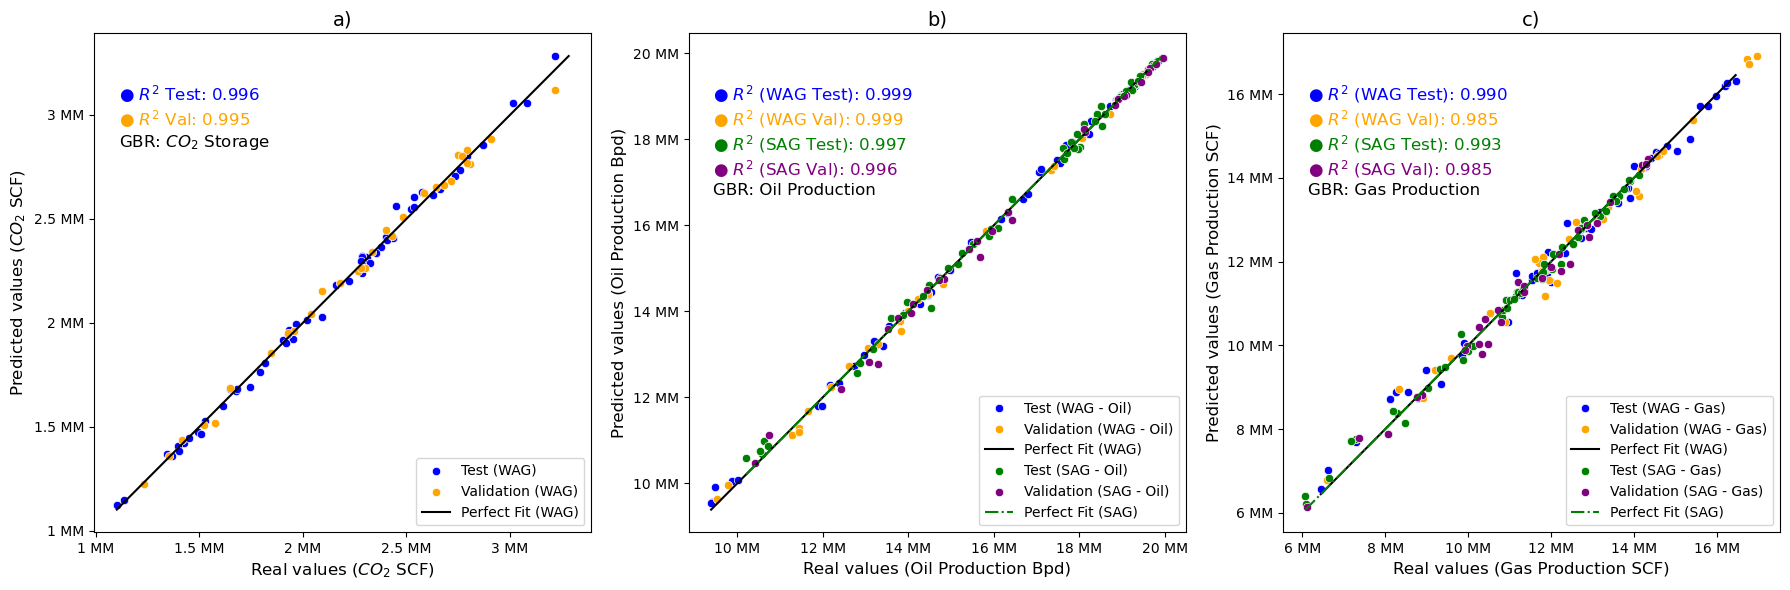

In [85]:
# Wag and Sag Cases

preds_test_gbr_wag = [y_pred_gbr, oil_pred_gbr, gas_pred_gbr]
preds_val_gbr_wag = [y_pred_gbr_val, oil_pred_gbr_val, gas_pred_gbr_val]

preds_test_gbr_sag = [oil_pred_gbr_sag, gas_pred_gbr_sag]
preds_val_gbr_sag = [oil_val_gbr_sag, gas_val_gbr_sag]

co2_scores_gbr_wag = [gbr_score_test_ran, gbr_score_val_ran]
oil_scores_gbr_wag = [gbr_score_test_ran_oil, gbr_score_val_ran_oil]
gas_scores_gbr_wag = [gbr_score_test_ran_gas, gbr_score_val_ran_gas]

oil_scores_gbr_sag = [gbr_score_test_ran_oil_sag, gbr_score_val_ran_oil_sag]
gas_scores_gbr_sag = [gbr_score_test_ran_gas_sag, gbr_score_val_ran_gas_sag]

scores_gbr_wag = [co2_scores_gbr_wag, oil_scores_gbr_wag, gas_scores_gbr_wag]
scores_gbr_sag = [oil_scores_gbr_sag, gas_scores_gbr_sag]

fitted_plots_sag(preds_test_gbr_wag, preds_val_gbr_wag, preds_test_gbr_sag, preds_val_gbr_sag, scores_gbr_wag, scores_gbr_sag, "GBR")

In [ ]:
# GBR

preds_test_gbr = [y_pred_gbr, oil_pred_gbr, gas_pred_gbr]
preds_val_gbr = [y_pred_gbr_val, oil_pred_gbr_val, gas_pred_gbr_val]

co2_scores_gbr = [gbr_score_test_ran, gbr_score_val_ran]
oil_scores_gbr = [gbr_score_test_ran_oil, gbr_score_val_ran_oil]
gas_scores = [gbr_score_test_ran_gas, gbr_score_val_ran_gas]

scores_gbr = [co2_scores, oil_scores, gas_scores]

fitted_plots(preds_test_gbr, preds_val_gbr, scores_gbr, "GBR")

In [ ]:
# KNN

preds_test_knn = [y_pred_knn, oil_pred_knn, gas_pred_knn]
preds_val_knn = [y_val_knn, oil_val_knn, gas_val_knn]

co2_scores_knn = [knn_score_test_ran, knn_score_val_ran]
oil_scores_knn = [knn_score_test_ran_oil, knn_score_val_ran_oil]
gas_scores_knn = [knn_score_test_ran_gas, knn_score_val_ran_gas]

scores_knn = [co2_scores_knn, oil_scores_knn, gas_scores_knn]

fitted_plots(preds_test_knn, preds_val_knn, scores_knn, "KNN")

In [ ]:
# DT

preds_test_dt = [y_pred_dt, oil_pred_dt, gas_pred_dt]
preds_val_dt = [y_val_dt, oil_val_dt, gas_val_dt]

co2_scores_dt = [dt_score_test_ran, dt_score_val_ran]
oil_scores_dt = [dt_score_test_ran_oil, dt_score_val_ran_oil]
gas_scores_dt = [dt_score_test_ran_gas, dt_score_val_ran_gas]

scores_dt = [co2_scores_dt, oil_scores_dt, gas_scores_dt]

fitted_plots(preds_test_dt, preds_val_dt, scores_dt, "Decision Tree")

In [ ]:
# RF

preds_test_rf = [y_pred_rf, oil_pred_rf, gas_pred_rf]
preds_val_rf = [y_val_rf, oil_val_rf, gas_val_rf]

co2_scores_rf = [rf_score_test_ran, rf_score_val_ran]
oil_scores_rf = [rf_score_test_ran_oil, rf_score_val_ran_oil]
gas_scores_rf = [rf_score_test_ran_gas, rf_score_val_ran_gas]

scores_rf = [co2_scores_rf, oil_scores_rf, gas_scores_rf]

fitted_plots(preds_test_rf, preds_val_rf, scores_rf, "Random Forest")

## 3.3. Models Training, Optimization, and Evaluation (GridSearchCV)

In [ ]:
# Function to train each model

def training_model_GS(model_name, param_grid):
    model = GridSearchCV(model_name, param_grid=param_grid, scoring="r2")
    model.fit(X_train, y_train)
    return model

### 3.3.1. Training using KNN

In [ ]:
# KNN Algorithm
knn_model = training_model_GS(knn, knn_params)
knn_model.best_params_

In [ ]:
# Choose best estimator
knn_model_final = knn_model.best_estimator_.fit(X_train, y_train)

# Prediction on test set
y_pred_knn = knn_model_final.predict(X_test)

# Prediction on validation set
y_val_knn = knn_model_final.predict(X_val)

In [ ]:
# Efficiency of model
print(knn_model_final.score(X_train, y_train))

knn_score_test_grid = knn_model_final.score(X_test, y_test)
print(knn_score_test_grid)

knn_score_val_grid = knn_model_final.score(X_val, y_val) 
print(knn_score_val_grid)

### 3.3.2. Training using GBR

In [ ]:
start_time_grid = time.time()

# GBR Algorithm
gbr_model = training_model_GS(gbr, gbr_params)
gbr_model.best_params_

end_time_grid = time.time()

# Calculate the time taken for training
training_time_gbr_grid = (end_time_grid - start_time_grid) / 60
print(f"Training time GBR using GridSearch: {training_time_gbr_grid:.2f} Minutes")

In [ ]:
gbr_model.best_params_

In [ ]:
gbr_model_final = gbr_model.best_estimator_.fit(X_train, y_train)

# Prediction on test set
y_pred_gbr = gbr_model_final.predict(X_test)

# Prediction on validation set
y_val_gbr = gbr_model_final.predict(X_val)

In [ ]:
# Efficiency of model
print(gbr_model_final.score(X_train, y_train))

gbr_score_test_grid = gbr_model_final.score(X_test, y_test)
print(gbr_score_test_grid)

gbr_score_val_grid = gbr_model_final.score(X_val, y_val) 
print(gbr_score_val_grid)

### 3.3.3 Training using Decision Tree

In [ ]:
# DT Algorithm
dt_model = training_model_GS(dt, dt_params)
dt_model.best_params_

In [ ]:
dt_model_final = dt_model.best_estimator_.fit(X_train, y_train)

# Prediction on test set
y_pred_dt = dt_model_final.predict(X_test)

# Prediction on validation set
y_val_dt = dt_model_final.predict(X_val)

In [ ]:
# Efficiency of model
print(dt_model_final.score(X_train, y_train))

dt_score_test_grid = dt_model_final.score(X_test, y_test)
print(dt_score_test_grid)

dt_score_val_grid = dt_model_final.score(X_val, y_val)
print(dt_score_val_grid)

### 3.3.4. Training using Random Forest

In [ ]:
# RF Algorithm
rf_model = training_model_GS(rf, rf_params)
rf_model.best_params_

In [ ]:
rf_model_final = rf_model.best_estimator_.fit(X_train, y_train)

# Prediction on test set
y_pred_rf = rf_model_final.predict(X_test)

# Prediction on validation set
y_val_rf = rf_model_final.predict(X_val)

In [ ]:
# Efficiency of model
print(rf_model_final.score(X_train, y_train))

rf_score_test_grid = rf_model_final.score(X_test, y_test)
print(rf_score_test_grid)

rf_score_val_grid = rf_model_final.score(X_val, y_val)
print(rf_score_val_grid)

## 3.4. Models Training, Optimization, and Evaluation (Particle Swarm Optimization (PSO))

In [ ]:
# Function to optimize wiht PSO

def training_model_PSO(model_name, param_ranges, X_train, y_train, cv=5):
    def objective_function(params):
        """Objective function to minimize (negative R2 score)."""
        # Ensure integer values for integer parameters
        params_dict = {}
        for key, param in zip(param_ranges.keys(), params):
            if isinstance(param_ranges[key][0], np.integer):  # Ensure integer conversion for integer params
                params_dict[key] = int(param)
            else:
                params_dict[key] = int(param)

        
        model = model_name(**params_dict)
        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="r2", error_score="raise")
        return -np.mean(scores)  # Minimize negative R2

    # Extract parameter bounds
    bounds = [(min(val), max(val)) for val in param_ranges.values()]
    
    # Run PSO
    optimal_params, _ = pso(
        objective_function, 
        lb=[b[0] for b in bounds], 
        ub=[b[1] for b in bounds], 
        swarmsize=20, 
        maxiter=50
    )
    
    # Map optimal_params back to parameter names with integer enforcement
    optimal_params_dict = {}
    for key, param in zip(param_ranges.keys(), optimal_params):
        if isinstance(param_ranges[key][0], int):
            optimal_params_dict[key] = int(param)  # Explicitly cast to int
        else:
            optimal_params_dict[key] = int(param)
    
    # Train model with optimal parameters
    model = model_name(**optimal_params_dict)
    model.fit(X_train, y_train)
    return model, optimal_params_dict

### 3.4.1. Training using KNN

In [ ]:
knn_model, knn_best_params = training_model_PSO(KNeighborsRegressor, knn_params, X_train, y_train)

In [ ]:
knn_best_params

In [ ]:
# Choose best estimator
knn_model_final = knn_model.fit(X_train, y_train)

# Prediction on test set
y_pred_knn = knn_model_final.predict(X_test)

# Prediction on validation set
y_val_knn = knn_model_final.predict(X_val)

In [ ]:
# Efficiency of model
print(knn_model_final.score(X_train, y_train))

knn_score_test_pso = knn_model_final.score(X_test, y_test)
print(knn_score_test_pso)

knn_score_val_pso = knn_model_final.score(X_val, y_val)
print(knn_score_val_pso)

### 3.4.2. Training using GBR

In [ ]:
start_time_pso = time.time()

gbr_model, gbr_best_params = training_model_PSO(GradientBoostingRegressor, gbr_params, X_train, y_train)

end_time_pso = time.time()

# Calculate the time taken for training
training_time = (end_time_pso - start_time_pso) / 60
print(f"Training time for GBR using PSO: {training_time:.2f} Minutes")

In [ ]:
gbr_best_params

In [ ]:
gbr_model_final = gbr_model.fit(X_train, y_train)

# Prediction on test set
y_pred_gbr = gbr_model_final.predict(X_test)

# Prediction on validation set
y_val_gbr = gbr_model_final.predict(X_val)

In [ ]:
# Efficiency of model
print(gbr_model_final.score(X_train, y_train))

gbr_score_test_pso = gbr_model_final.score(X_test, y_test)
print(gbr_score_test_pso)

gbr_score_val_pso = gbr_model_final.score(X_val, y_val)
print(gbr_score_val_pso)

### 3.4.3. Training using DT

In [ ]:
dt_model, dt_best_params = training_model_PSO(DecisionTreeRegressor, dt_params, X_train, y_train)

In [ ]:
dt_best_params

In [ ]:
dt_model_final = dt_model.fit(X_train, y_train)

# Prediction on test set
y_pred_dt = dt_model_final.predict(X_test)

# Prediction on validation set
y_val_dt = dt_model_final.predict(X_val)

In [ ]:
# Efficiency of model
print(dt_model_final.score(X_train, y_train))

dt_score_test_pso = dt_model_final.score(X_test, y_test)
print(dt_score_test_pso)

dt_score_val_pso = dt_model_final.score(X_val, y_val)
print(dt_score_val_pso)

### 3.4.4. Training using RF

In [ ]:
rf_model, rf_bets_params = training_model_PSO(RandomForestRegressor, rf_params, X_train, y_train)

In [ ]:
rf_bets_params

In [ ]:
rf_model_final = rf_model.fit(X_train, y_train)

# Prediction on test set
y_pred_rf = rf_model_final.predict(X_test)

# Prediction on validation set
y_val_rf = rf_model_final.predict(X_val)

In [ ]:
# Efficiency of model
print(rf_model_final.score(X_train, y_train))

rf_score_test_pso = rf_model_final.score(X_test, y_test)
print(rf_score_test_pso)

rf_score_val_pso = rf_model_final.score(X_val, y_val)
print(rf_score_val_pso)

# 3.5. Summary Results of Training and Predictions

In [ ]:
# Models
models = np.array(["KNN", "Gradiente Boosting Regressor", "Decision Tree", "Random Forest"])

# Metrics of optimizers
# No
r2_test = np.array([knn_score_test, gbr_score_test, dt_score_test, rf_score_test])
r2_val = np.array([knn_score_val, gbr_score_val, dt_score_val, rf_score_val])


# RandomnizedSearchCV
r2_test_ran = np.array([knn_score_test_ran, gbr_score_test_ran, dt_score_test_ran, rf_score_test_ran])
r2_val_ran = np.array([knn_score_val_ran, gbr_score_val_ran, dt_score_val_ran, rf_score_val_ran])

# GridSearchCV
r2_test_grid = np.array([knn_score_test_grid, gbr_score_test_grid, dt_score_test_grid, rf_score_test_grid])
r2_val_grid = np.array([knn_score_val_grid, gbr_score_val_grid, dt_score_val_grid, rf_score_val_grid])

# PSO
r2_test_pso = np.array([knn_score_test_pso, gbr_score_test_pso, dt_score_test_pso, rf_score_test_pso])
r2_val_pso = np.array([knn_score_val_pso, gbr_score_val_pso, dt_score_val_pso, rf_score_val_pso])

# Dataframe
results = pd.DataFrame({"Models": models,"$R^{2}test$":r2_test, "$R^{2}val$":r2_val, 
                        "$R^{2}test_Ran$":r2_test_ran, "$R^{2}val_Ran$":r2_val_ran,
                        "$R^{2}test_Grid$":r2_test_grid, "$R^{2}val_Grid$":r2_val_grid,
                        "$R^{2}test_PSO$":r2_test_pso, "$R^{2}val_PSO$":r2_val_pso})
results.to_csv('wag_co2retained_ran.csv', index=False)
results